In [1]:
!pip install wfdb

# Ki·ªÉm tra phi√™n b·∫£n Python v√† c√°c th∆∞ vi·ªán quan tr·ªçng
import sys
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import wfdb
print(f"Python version: {sys.version}")
print(f"PyTorch version: {torch.__version__}")
print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA version: {torch.version.cuda if torch.cuda.is_available() else 'Notavailable'}")
print(f"GPU devices: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'None'}")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 162.3/162.3 kB 3.3 MB/s eta 0:00:00a 0:00:01
Python version: 3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
PyTorch version: 2.5.1+cu121
TensorFlow version: 2.17.1
NumPy version: 1.26.4
CUDA available: True
CUDA version: 12.1
GPU devices: Tesla T4


In [2]:
num_gpus = torch.cuda.device_count()
print("S·ªë GPU c√≥ s·∫µn:", num_gpus)

S·ªë GPU c√≥ s·∫µn: 2


In [4]:
import os

# ƒê∆∞·ªùng d·∫´n ƒë·∫øn th∆∞ m·ª•c d·ªØ li·ªáu trong dataset Kaggle
bidmc_data_path = r'/kaggle/input/bidmc-capno-datasets/bidmc'

# Th∆∞ m·ª•c train_folder n·∫±m trong th∆∞ m·ª•c l√†m vi·ªác c·ªßa Kaggle Notebook
train_folder = "train_folder"
train_path = os.path.join(r'/kaggle/working/', train_folder)
os.makedirs(train_path, exist_ok=True)


In [5]:
def check_gpu_status():
    if torch.cuda.is_available():
        print(f"GPU ƒëang s·ª≠ d·ª•ng: {torch.cuda.get_device_name(0)}")
        print("S·ªë GPU c√≥ s·∫µn:", torch.cuda.device_count())
        print(f"B·ªô nh·ªõ GPU ƒë∆∞·ª£c c·∫•p ph√°t:{torch.cuda.memory_allocated(0)/1024**2:.2f} MB")
        print(f"B·ªô nh·ªõ GPU d√†nh ri√™ng: {torch.cuda.memory_reserved(0)/1024**2:.2f}MB")
    else:
        print("Kh√¥ng c√≥ GPU kh·∫£ d·ª•ng. S·ª≠ d·ª•ng CPU.")
def set_seed(seed=42):
    """ƒê·∫∑t gi√° tr·ªã seed cho t√≠nh t√°i l·∫≠p"""
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed) # N·∫øu s·ª≠ d·ª•ng nhi·ªÅu GPU
    tf.random.set_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f"ƒê√£ thi·∫øt l·∫≠p seed = {seed}")
# Thi·∫øt l·∫≠p ƒë·ªÉ t√°i l·∫≠p k·∫øt qu·∫£
set_seed()
check_gpu_status()

ƒê√£ thi·∫øt l·∫≠p seed = 42
GPU ƒëang s·ª≠ d·ª•ng: Tesla T4
S·ªë GPU c√≥ s·∫µn: 2
B·ªô nh·ªõ GPU ƒë∆∞·ª£c c·∫•p ph√°t:0.00 MB
B·ªô nh·ªõ GPU d√†nh ri√™ng: 0.00MB


Danh s√°ch c√°c file BMDIC:
['bidmc08.breath', 'bidmc52.breath', 'bidmc17n.hea', 'bidmc44n.dat', 'bidmc31.dat', 'bidmc51.dat', 'bidmc33n.hea', 'bidmc21.hea', 'bidmc37n.hea', 'bidmc34n.dat', 'bidmc53n.dat', 'bidmc18.dat', 'bidmc20.breath', 'bidmc25.dat', 'bidmc04n.dat', 'bidmc08.hea', 'bidmc53.breath', 'ANNOTATORS', 'bidmc28.hea', 'bidmc51n.dat', 'bidmc44n.hea', 'bidmc45n.dat', 'bidmc26n.hea', 'bidmc22n.hea', 'SHA256SUMS.txt', 'bidmc47.dat', 'bidmc39.breath', 'bidmc23.breath', 'bidmc03n.dat', 'bidmc49n.dat', 'bidmc07n.dat', 'bidmc25n.hea', 'bidmc33.hea', 'bidmc32.breath', 'bidmc36.dat', 'bidmc06n.hea', 'bidmc48.hea', 'bidmc35.dat', 'bidmc53.hea', 'bidmc44.dat', 'bidmc30.breath', 'bidmc36.hea', 'bidmc30n.dat', 'bidmc53n.hea', 'bidmc10.hea', 'bidmc25.breath', 'bidmc40n.dat', 'bidmc46n.dat', 'bidmc31n.hea', 'bidmc09.breath', 'bidmc26n.dat', 'bidmc16.dat', 'bidmc35n.dat', 'bidmc19n.hea', 'bidmc34n.hea', 'bidmc08.dat', 'bidmc22.hea', 'bidmc05.hea', 'LICENSE', 'bidmc25.hea', 'bidmc45n.hea', '

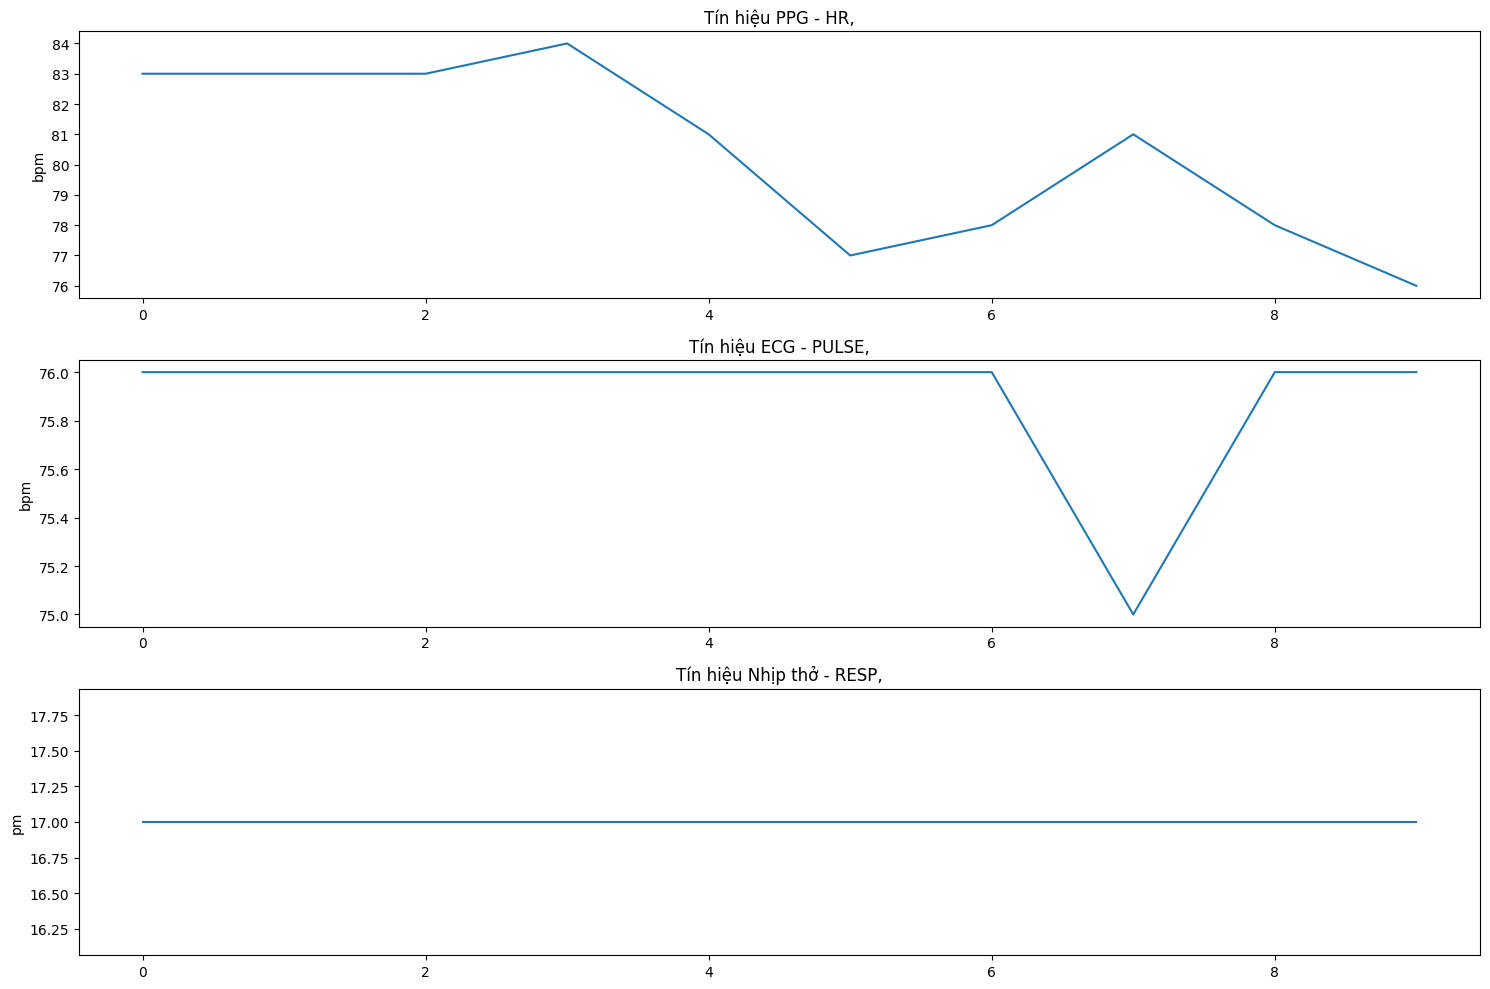

In [6]:
def explore_bidmc_dataset():
# Li·ªát k√™ c√°c file trong th∆∞ m·ª•c d·ªØ li·ªáu
    print("Danh s√°ch c√°c file BMDIC:")
    print(os.listdir(bidmc_data_path))
    sample_file = None
    files = os.listdir(bidmc_data_path)
    for file in files:
        if file.endswith('.dat') or file.endswith('.hea'):
            sample_file = os.path.join(bidmc_data_path,os.path.splitext(file)[0])
            break
    if sample_file:
        try:
            # ƒê·ªçc d·ªØ li·ªáu
            record = wfdb.rdrecord(sample_file)
            print(f"\nTh√¥ng tin file m·∫´u BMDIC:")
            print(f"T·∫ßn s·ªë l·∫•y m·∫´u: {record.fs} Hz")
            print(f"S·ªë l∆∞·ª£ng k√™nh: {record.n_sig}")
            print(f"T√™n c√°c k√™nh: {record.sig_name}")
            print(f"S·ªë l∆∞·ª£ng m·∫´u: {record.sig_len}")
            print(f"ƒê∆°n v·ªã: {record.units}")
            # Hi·ªÉn th·ªã
            plt.figure(figsize=(15, 10))
            # X√°c ƒë·ªãnh s·ªë l∆∞·ª£ng k√™nh c·∫ßn hi·ªÉn th·ªã
            n_channels = min(3, record.n_sig) # Hi·ªÉn th·ªã t·ªëi ƒëa 3 k√™nh
            # T√¨m v·ªã tr√≠ c·ªßa c√°c k√™nh quan tr·ªçng
            ppg_idx = next((i for i, name in enumerate(record.sig_name) if 'ppg' in name.lower()), 0)
            ecg_idx = next((i for i, name in enumerate(record.sig_name) if 'ecg' in name.lower()), 1 % record.n_sig)
            resp_idx = next((i for i, name in enumerate(record.sig_name) if 'resp' in name.lower() or 'breath' in name.lower()), 2 % record.n_sig)
            # Hi·ªÉn th·ªã 10 gi√¢y ƒë·∫ßu ti√™n
            seconds_to_show = 10
            samples_to_show = int(seconds_to_show * record.fs)
            # Hi·ªÉn th·ªã t·ª´ng k√™nh
            plt.subplot(n_channels, 1, 1)
            plt.plot(record.p_signal[:samples_to_show, ppg_idx])
            plt.title(f"T√≠n hi·ªáu PPG - {record.sig_name[ppg_idx]}")
            plt.ylabel(record.units[ppg_idx])
            plt.subplot(n_channels, 1, 2)
            plt.plot(record.p_signal[:samples_to_show, ecg_idx])
            plt.title(f"T√≠n hi·ªáu ECG - {record.sig_name[ecg_idx]}")
            plt.ylabel(record.units[ecg_idx])
            if n_channels > 2:
                plt.subplot(n_channels, 1, 3)
                plt.plot(record.p_signal[:samples_to_show, resp_idx])
                plt.title(f"T√≠n hi·ªáu Nh·ªãp th·ªü - {record.sig_name[resp_idx]}")
                plt.ylabel(record.units[resp_idx])
            plt.tight_layout()
            plt.show()
            return record
        except Exception as e:
            print(f"ƒê·ªçc file b·ªã l·ªói. {e}")
        else:
            print("Kh√¥ng t√¨m th·∫•y file m·∫´u v·ªõi ƒë·ªãnh d·∫°ng h·ªó tr·ª£ trong th∆∞ m·ª•c BIDMC")

explore_bidmc_dataset()

In [7]:
ieee_data_path = r"/kaggle/input/bidmc-capno-datasets/capno/data/mat"

üìÇ Danh s√°ch c√°c file Capno IEEE:
  - 0105_8min.mat
  - 0030_8min.mat
  - 0028_8min.mat
  - 0313_8min.mat
  - 0015_8min.mat
  - 0147_8min.mat
  - 0370_8min.mat
  - 0035_8min.mat
  - 0148_8min.mat
  - 0150_8min.mat
  - 0330_8min.mat
  - 0325_8min.mat
  - 0032_8min.mat
  - 0133_8min.mat
  - 0038_8min.mat
  - 0127_8min.mat
  - 0115_8min.mat
  - 0123_8min.mat
  - 0023_8min.mat
  - 0149_8min.mat
  - 0103_8min.mat
  - 0104_8min.mat
  - 0312_8min.mat
  - 0018_8min.mat
  - 0128_8min.mat
  - 0134_8min.mat
  - 0029_8min.mat
  - 0121_8min.mat
  - 0122_8min.mat
  - 0322_8min.mat
  - 0328_8min.mat
  - 0009_8min.mat
  - 0125_8min.mat
  - 0031_8min.mat
  - 0329_8min.mat
  - 0016_8min.mat
  - 0142_8min.mat
  - 0311_8min.mat
  - 0331_8min.mat
  - 0333_8min.mat
  - 0332_8min.mat
  - 0309_8min.mat

üìú Th√¥ng tin file m·∫´u: 0105_8min.mat
üîë C√°c kh√≥a ch√≠nh: ['#refs#', 'SFresults', 'labels', 'meta', 'param', 'reference', 'signal']
‚úÖ Extracted 'co2/y' data: shape (144001,), dtype float64
‚úÖ Ex

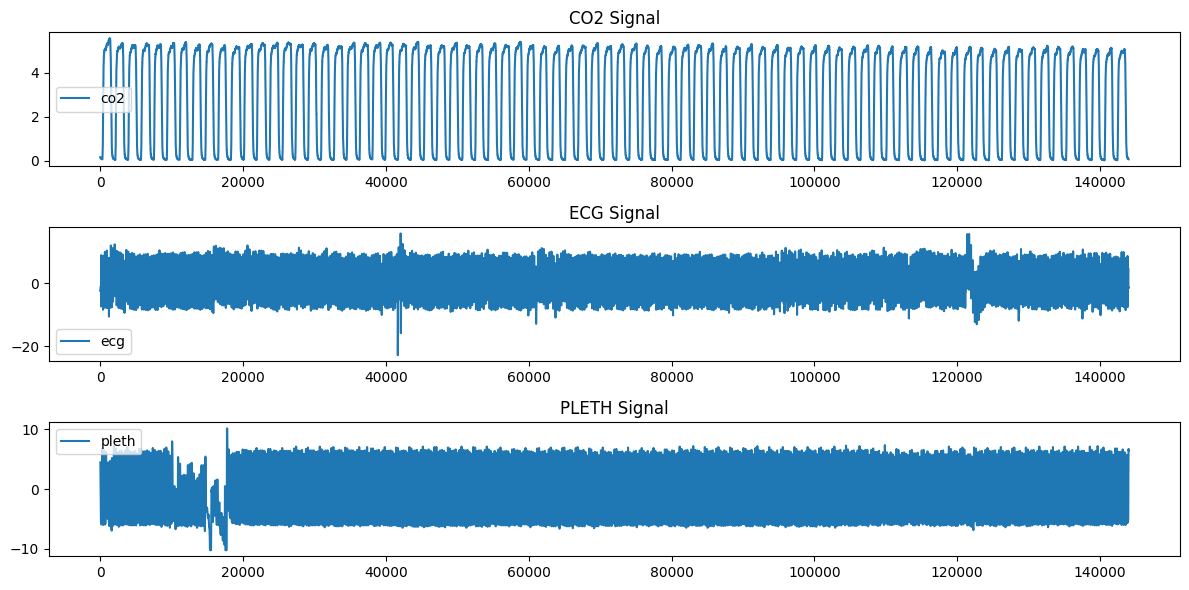

{'co2': array([0.16, 0.16, 0.16, ..., 0.06, 0.06, 0.06]),
 'ecg': array([-2.43, -2.43, -2.43, ..., -1.49, -1.52, -1.54]),
 'pleth': array([4.48, 4.32, 4.16, ..., 6.64, 6.56, 6.48])}

In [8]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

def explore_capno_dataset():
    """Kh√°m ph√° v√† hi·ªÉn th·ªã th√¥ng tin c∆° b·∫£n v·ªÅ b·ªô d·ªØ li·ªáu Capno IEEE (MATLAB v7.3 - HDF5)"""

    # Li·ªát k√™ c√°c file trong th∆∞ m·ª•c d·ªØ li·ªáu
    print("üìÇ Danh s√°ch c√°c file Capno IEEE:")
    files = [f for f in os.listdir(ieee_data_path) if f.endswith('.mat')]
    if not files:
        print("‚ùå Kh√¥ng t√¨m th·∫•y file .mat n√†o trong th∆∞ m·ª•c!")
        return None

    for file in files:
        print(f"  - {file}")

    # L·∫•y file m·∫´u ƒë·∫ßu ti√™n
    sample_file = os.path.join(ieee_data_path, files[0])

    try:
        # ƒê·ªçc file .mat s·ª≠ d·ª•ng h5py
        with h5py.File(sample_file, "r") as mat_file:
            print(f"\nüìú Th√¥ng tin file m·∫´u: {os.path.basename(sample_file)}")
            print(f"üîë C√°c kh√≥a ch√≠nh: {list(mat_file.keys())}")

            # Ki·ªÉm tra nh√≥m "signal"
            if "signal" not in mat_file:
                print("‚ùå Kh√¥ng t√¨m th·∫•y nh√≥m 'signal' trong file!")
                return None

            signal_group = mat_file["signal"]
            signals = {}

            # L·∫∑p qua c√°c t√≠n hi·ªáu (co2, ecg, pleth)
            for key in signal_group.keys():
                sub_group = signal_group[key]  # Access 'co2', 'ecg', 'pleth'

                if isinstance(sub_group, h5py.Group) and "y" in sub_group:
                    data = np.array(sub_group["y"]).flatten()  # Flatten to 1D array
                    signals[key] = data
                    print(f"‚úÖ Extracted '{key}/y' data: shape {data.shape}, dtype {data.dtype}")

            # üìä Hi·ªÉn th·ªã t√≠n hi·ªáu
            if not signals:
                print("‚ùå Kh√¥ng c√≥ t√≠n hi·ªáu n√†o ƒë∆∞·ª£c tr√≠ch xu·∫•t!")
                return None

            plt.figure(figsize=(12, 6))
            for i, (key, data) in enumerate(signals.items(), start=1):
                plt.subplot(len(signals), 1, i)
                plt.plot(data, label=key)
                plt.title(f"{key.upper()} Signal")
                plt.legend()

            plt.tight_layout()
            plt.show()

            return signals

    except Exception as e:
        print(f"‚ùå L·ªói khi ƒë·ªçc file Capno IEEE: {e}")
        return None
explore_capno_dataset()

In [9]:
def prepare_combined_dataset(bidmc_path, capno_path, save_path):
    import wfdb
    import scipy.io
    import numpy as np
    import os
    import h5py
    from tqdm import tqdm

    # T·∫°o th∆∞ m·ª•c l∆∞u tr·ªØ n·∫øu ch∆∞a t·ªìn t·∫°i
    os.makedirs(save_path, exist_ok=True)


    # Danh s√°ch ƒë·ªÉ l∆∞u d·ªØ li·ªáu t·ª´ c·∫£ hai b·ªô
    ppg_segments = []
    ecg_segments = []
    resp_segments = []

    # L·∫•y danh s√°ch c√°c file c√≥ ƒëu√¥i .dat ho·∫∑c .hea
    bidmc_files = [f for f in os.listdir(bidmc_path) if f.endswith('.dat') or f.endswith('.hea')]
    bidmc_record_names = set(os.path.splitext(f)[0] for f in bidmc_files)

    for record_name in tqdm(bidmc_record_names):
        try:
            record_path = os.path.join(bidmc_path, record_name)
            record = wfdb.rdrecord(record_path)

            # T√¨m v·ªã tr√≠ c·ªßa c√°c k√™nh quan tr·ªçng
            ppg_idx = next((i for i, name in enumerate(record.sig_name) if 'ppg' in name.lower()), None)
            ecg_idx = next((i for i, name in enumerate(record.sig_name) if 'ecg' in name.lower()), None)
            resp_idx = next((i for i, name in enumerate(record.sig_name) if 'resp' in name.lower() or 'breath' in name.lower()), None)

            # Ki·ªÉm tra xem c√≥ ƒë·ªß 3 k√™nh c·∫ßn thi·∫øt kh√¥ng
            if ppg_idx is not None and ecg_idx is not None and resp_idx is not None:
                # Tr√≠ch xu·∫•t t√≠n hi·ªáu
                ppg_signal = record.p_signal[:, ppg_idx]
                ecg_signal = record.p_signal[:, ecg_idx]
                resp_signal = record.p_signal[:, resp_idx]

                # Ph√¢n ƒëo·∫°n t√≠n hi·ªáu th√†nh c√°c c·ª≠a s·ªï 10 gi√¢y
                window_size = int(10 * record.fs)  # 10 gi√¢y
                stride = int(5 * record.fs)  # 5 gi√¢y (ch·ªìng l·∫•p 50%)

                for i in range(0, len(ppg_signal) - window_size, stride):
                    ppg_window = ppg_signal[i:i + window_size]
                    ecg_window = ecg_signal[i:i + window_size]
                    resp_window = resp_signal[i:i + window_size]

                    # Ki·ªÉm tra ch·∫•t l∆∞·ª£ng ƒëo·∫°n t√≠n hi·ªáu (kh√¥ng c√≥ nhi·ªÅu gi√° tr·ªã 0 li√™n ti·∫øp)
                    if (np.count_nonzero(ppg_window) > 0.8 * window_size and
                        np.count_nonzero(ecg_window) > 0.8 * window_size and
                        np.count_nonzero(resp_window) > 0.8 * window_size):

                        # Th√™m v√†o danh s√°ch
                        ppg_segments.append(ppg_window)
                        ecg_segments.append(ecg_window)
                        resp_segments.append(resp_window)

        except Exception as e:
            print(f"L·ªói khi x·ª≠ l√Ω file BIDMC {record_name}: {e}")

    # X·ª≠ l√Ω d·ªØ li·ªáu Capno IEEE
    print("\nƒêang x·ª≠ l√Ω d·ªØ li·ªáu Capno IEEE...")
    capno_files = [f for f in os.listdir(capno_path) if f.endswith('.mat')]
    for file_name in tqdm(capno_files):
        try:
            file_path = os.path.join(capno_path, file_name)
            with h5py.File(file_path, "r") as mat_file:

                # Ki·ªÉm tra nh√≥m "signal"
                if "signal" not in mat_file:
                    continue

                signal_group = mat_file["signal"]
                signals = {}

                # L·∫∑p qua c√°c t√≠n hi·ªáu (co2, ecg, pleth)
                for key in signal_group.keys():
                    sub_group = signal_group[key]  # Access 'co2', 'ecg', 'pleth'

                    if isinstance(sub_group, h5py.Group) and "y" in sub_group:
                        data = np.array(sub_group["y"]).flatten()  # Flatten to 1D array
                        signals[key] = data

                if "co2" in signals and "ecg" in signals and "pleth" in signals:
                    co2_signal = signals["co2"]
                    ecg_signal = signals["ecg"]
                    ppg_signal = signals["pleth"]

                    min_length = min(len(ppg_signal), len(ecg_signal), len(co2_signal))
                    ppg_signal = ppg_signal[:min_length]
                    ecg_signal = ecg_signal[:min_length]
                    co2_signal = co2_signal[:min_length]

                    fs = 100  # Gi·∫£ s·ª≠ t·∫ßn s·ªë l·∫•y m·∫´u l√† 100 Hz
                    window_size = int(10 * fs)  # 10 gi√¢y
                    stride = int(5 * fs)  # 5 gi√¢y (ch·ªìng l·∫•p 50%)

                    for i in range(0, min_length - window_size, stride):
                        ppg_window = ppg_signal[i:i + window_size]
                        ecg_window = ecg_signal[i:i + window_size]
                        co2_window = co2_signal[i:i + window_size]

                        if (np.count_nonzero(ppg_window) > 0.8 * window_size and
                            np.count_nonzero(ecg_window) > 0.8 * window_size and
                            np.count_nonzero(co2_window) > 0.8 * window_size):
                            ppg_segments.append(ppg_window)
                            ecg_segments.append(ecg_window)
                            resp_segments.append(co2_window)  # S·ª≠ d·ª•ng CO2 l√†m nh·ªãp th·ªü

        except Exception as e:
            print(f"L·ªói khi x·ª≠ l√Ω file Capno IEEE {file_name}: {e}")
    # Chuy·ªÉn ƒë·ªïi c√°c danh s√°ch th√†nh m·∫£ng numpy
    ppg_data = np.array(ppg_segments)
    ecg_data = np.array(ecg_segments)
    resp_data = np.array(resp_segments)
    print(f"\nT·ªïng s·ªë ph√¢n ƒëo·∫°n d·ªØ li·ªáu: {len(ppg_segments)}")
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu PPG: {ppg_data.shape}")
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu ECG: {ecg_data.shape}")
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu nh·ªãp th·ªü: {resp_data.shape}")
    # L∆∞u d·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω
    output_file = os.path.join(save_path, 'combined_dataset.npz')
    np.savez_compressed(
    output_file,
    ppg=ppg_data,
    ecg=ecg_data,
    resp=resp_data
    )
    print(f"ƒê√£ l∆∞u d·ªØ li·ªáu k·∫øt h·ª£p t·∫°i: {output_file}")
    return output_file
#K·∫øt h·ª£p
combined_data_path = prepare_combined_dataset(bidmc_data_path, ieee_data_path, train_path)


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 106/106 [00:02<00:00, 51.05it/s]



ƒêang x·ª≠ l√Ω d·ªØ li·ªáu Capno IEEE...


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 42/42 [00:02<00:00, 20.37it/s]



T·ªïng s·ªë ph√¢n ƒëo·∫°n d·ªØ li·ªáu: 11979
K√≠ch th∆∞·ªõc d·ªØ li·ªáu PPG: (11979, 1000)
K√≠ch th∆∞·ªõc d·ªØ li·ªáu ECG: (11979, 1000)
K√≠ch th∆∞·ªõc d·ªØ li·ªáu nh·ªãp th·ªü: (11979, 1000)
ƒê√£ l∆∞u d·ªØ li·ªáu k·∫øt h·ª£p t·∫°i: /kaggle/working/train_folder/combined_dataset.npz


In [10]:

def split_dataset(data_path, train_ratio=0.7, val_ratio=0.15, test_ratio=0.15):
    """
    Ph√¢n chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán, x√°c th·ª±c v√† ki·ªÉm tra.

    Tham s·ªë:
    - data_path: ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu ƒë√£ x·ª≠ l√Ω (.npz)
    - train_ratio, val_ratio, test_ratio: T·ª∑ l·ªá ph√¢n chia

    Tr·∫£ v·ªÅ:
    - ƒê∆∞·ªùng d·∫´n ƒë·∫øn c√°c file ƒë√£ ph√¢n chia
    """
    import numpy as np
    import os
    from sklearn.model_selection import train_test_split
    # Ki·ªÉm tra t·ªïng t·ª∑ l·ªá h·ª£p l·ªá
    assert abs(train_ratio + val_ratio + test_ratio - 1.0) < 1e-5, "T·ªïng c√°c t·ª∑ l·ªá ph·∫£i b·∫±ng 1"

    # T·∫°o th∆∞ m·ª•c ƒë·∫ßu ra
    output_dir = os.path.dirname(data_path)

    # ƒê·ªçc d·ªØ li·ªáu
    data = np.load(data_path)
    ppg = data['ppg']
    ecg = data['ecg']
    resp = data['resp']

    # Ph√¢n chia train v√† temp (val + test)
    ppg_train, ppg_temp, ecg_train, ecg_temp, resp_train, resp_temp = train_test_split(
        ppg, ecg, resp, train_size=train_ratio, random_state=42
    )

    # Ph√¢n chia temp th√†nh val v√† test
    val_ratio_adjusted = val_ratio / (val_ratio + test_ratio)
    ppg_val, ppg_test, ecg_val, ecg_test, resp_val, resp_test = train_test_split(
        ppg_temp, ecg_temp, resp_temp, train_size=val_ratio_adjusted, random_state=42
    )

    # In th√¥ng tin
    print("K√≠ch th∆∞·ªõc c√°c t·∫≠p d·ªØ li·ªáu:")
    print(f"T·∫≠p hu·∫•n luy·ªán: {len(ppg_train)} m·∫´u")
    print(f"T·∫≠p x√°c th·ª±c: {len(ppg_val)} m·∫´u")
    print(f"T·∫≠p ki·ªÉm tra: {len(ppg_test)} m·∫´u")

    # L∆∞u c√°c t·∫≠p d·ªØ li·ªáu
    train_path = os.path.join(output_dir, 'train_data.npz')
    val_path = os.path.join(output_dir, 'val_data.npz')
    test_path = os.path.join(output_dir, 'test_data.npz')

    np.savez_compressed(train_path, ppg=ppg_train, ecg=ecg_train, resp=resp_train)
    np.savez_compressed(val_path, ppg=ppg_val, ecg=ecg_val, resp=resp_val)
    np.savez_compressed(test_path, ppg=ppg_test, ecg=ecg_test, resp=resp_test)

    print(f"ƒê√£ l∆∞u t·∫≠p hu·∫•n luy·ªán t·∫°i: {train_path}")
    print(f"ƒê√£ l∆∞u t·∫≠p x√°c th·ª±c t·∫°i: {val_path}")
    print(f"ƒê√£ l∆∞u t·∫≠p ki·ªÉm tra t·∫°i: {test_path}")

    return train_path, val_path, test_path

# Ph√¢n chia d·ªØ li·ªáu
train_path, val_path, test_path = split_dataset(combined_data_path)


K√≠ch th∆∞·ªõc c√°c t·∫≠p d·ªØ li·ªáu:
T·∫≠p hu·∫•n luy·ªán: 8385 m·∫´u
T·∫≠p x√°c th·ª±c: 1797 m·∫´u
T·∫≠p ki·ªÉm tra: 1797 m·∫´u
ƒê√£ l∆∞u t·∫≠p hu·∫•n luy·ªán t·∫°i: /kaggle/working/train_folder/train_data.npz
ƒê√£ l∆∞u t·∫≠p x√°c th·ª±c t·∫°i: /kaggle/working/train_folder/val_data.npz
ƒê√£ l∆∞u t·∫≠p ki·ªÉm tra t·∫°i: /kaggle/working/train_folder/test_data.npz


In [11]:
import numpy as np
import os
from tqdm import tqdm
from scipy import signal as scipy_signal

def standardize_sampling_rate(signal, original_fs, target_fs=250):
    """
    Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u c·ªßa t√≠n hi·ªáu.

    Tham s·ªë:
    - signal: M·∫£ng numpy ch·ª©a t√≠n hi·ªáu
    - original_fs: T·∫ßn s·ªë l·∫•y m·∫´u g·ªëc (Hz)
    - target_fs: T·∫ßn s·ªë l·∫•y m·∫´u m·ª•c ti√™u (Hz)

    Tr·∫£ v·ªÅ:
    - T√≠n hi·ªáu ƒë√£ chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u
    """



    # N·∫øu t·∫ßn s·ªë l·∫•y m·∫´u ƒë√£ ƒë√∫ng, kh√¥ng c·∫ßn x·ª≠ l√Ω
    if original_fs == target_fs:
        return signal

    # T√≠nh to√°n s·ªë l∆∞·ª£ng m·∫´u m·ªõi
    orig_len = len(signal)
    new_len = int(orig_len * (target_fs / original_fs))

    # Resample t√≠n hi·ªáu
    resampled_signal = scipy_signal.resample(signal, new_len)

    return resampled_signal


def standardize_dataset_sampling_rate(data_path, bidmc_fs=250, capno_fs=100, target_fs=250):
    """
    Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u cho to√†n b·ªô b·ªô d·ªØ li·ªáu.

    Tham s·ªë:
    - data_path: ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu
    - bidmc_fs: T·∫ßn s·ªë l·∫•y m·∫´u c·ªßa d·ªØ li·ªáu BIDMC
    - capno_fs: T·∫ßn s·ªë l·∫•y m·∫´u c·ªßa d·ªØ li·ªáu Capno
    - target_fs: T·∫ßn s·ªë l·∫•y m·∫´u m·ª•c ti√™u

    Tr·∫£ v·ªÅ:
    - ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a
    """
    # ƒê·ªçc d·ªØ li·ªáu
    data = np.load(data_path)
    ppg = data['ppg']
    ecg = data['ecg']
    resp = data['resp']

    # X√°c ƒë·ªãnh xem t√≠n hi·ªáu c√≥ ph·∫£i t·ª´ Capno hay kh√¥ng d·ª±a v√†o ƒë·ªô d√†i
    # Gi·∫£ s·ª≠ t√≠n hi·ªáu t·ª´ BIDMC c√≥ ƒë·ªô d√†i = 10s * 250Hz = 2500 m·∫´u
    # Gi·∫£ s·ª≠ t√≠n hi·ªáu t·ª´ Capno c√≥ ƒë·ªô d√†i = 10s * 100Hz = 1000 m·∫´u
    window_size_bidmc = 10 * bidmc_fs
    window_size_capno = 10 * capno_fs

    # Chu·∫©n h√≥a t·ª´ng ph√¢n ƒëo·∫°n
    ppg_resampled = []
    ecg_resampled = []
    resp_resampled = []

    for i in tqdm(range(len(ppg)), desc="Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u"):
        # X√°c ƒë·ªãnh t·∫ßn s·ªë g·ªëc d·ª±a v√†o ƒë·ªô d√†i
        orig_len = len(ppg[i])
        original_fs = bidmc_fs if abs(orig_len - window_size_bidmc) < abs(orig_len - window_size_capno) else capno_fs

        # Chu·∫©n h√≥a t·ª´ng t√≠n hi·ªáu
        ppg_resampled.append(standardize_sampling_rate(ppg[i], original_fs, target_fs))
        ecg_resampled.append(standardize_sampling_rate(ecg[i], original_fs, target_fs))
        resp_resampled.append(standardize_sampling_rate(resp[i], original_fs, target_fs))

    # Chuy·ªÉn ƒë·ªïi th√†nh m·∫£ng numpy
    ppg_resampled = np.array(ppg_resampled)
    ecg_resampled = np.array(ecg_resampled)
    resp_resampled = np.array(resp_resampled)

    # In th√¥ng tin
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi chu·∫©n h√≥a:")
    print(f"PPG: {ppg_resampled.shape}")
    print(f"ECG: {ecg_resampled.shape}")
    print(f"Nh·ªãp th·ªü: {resp_resampled.shape}")

    # L∆∞u d·ªØ li·ªáu ƒë√£ chu·∫©n h√≥a
    output_dir = os.path.dirname(data_path)
    output_file = os.path.join(output_dir, os.path.basename(data_path).replace('.npz', '_standardized.npz'))

    np.savez_compressed(output_file, ppg=ppg_resampled, ecg=ecg_resampled, resp=resp_resampled)

    print(f"ƒê√£ l∆∞u d·ªØ li·ªáu chu·∫©n h√≥a t·∫°i: {output_file}")
    return output_file


# Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u cho t·ª´ng t·∫≠p d·ªØ li·ªáu
train_std_path = standardize_dataset_sampling_rate(train_path)
val_std_path = standardize_dataset_sampling_rate(val_path)
test_std_path = standardize_dataset_sampling_rate(test_path)


Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8385/8385 [00:01<00:00, 4290.37it/s]


K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi chu·∫©n h√≥a:
PPG: (8385, 2500)
ECG: (8385, 2500)
Nh·ªãp th·ªü: (8385, 2500)
ƒê√£ l∆∞u d·ªØ li·ªáu chu·∫©n h√≥a t·∫°i: /kaggle/working/train_folder/train_data_standardized.npz


Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1797/1797 [00:00<00:00, 5274.22it/s]


K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi chu·∫©n h√≥a:
PPG: (1797, 2500)
ECG: (1797, 2500)
Nh·ªãp th·ªü: (1797, 2500)
ƒê√£ l∆∞u d·ªØ li·ªáu chu·∫©n h√≥a t·∫°i: /kaggle/working/train_folder/val_data_standardized.npz


Chu·∫©n h√≥a t·∫ßn s·ªë l·∫•y m·∫´u: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1797/1797 [00:00<00:00, 5555.03it/s]


K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi chu·∫©n h√≥a:
PPG: (1797, 2500)
ECG: (1797, 2500)
Nh·ªãp th·ªü: (1797, 2500)
ƒê√£ l∆∞u d·ªØ li·ªáu chu·∫©n h√≥a t·∫°i: /kaggle/working/train_folder/test_data_standardized.npz


Loaded original sample: Length=1000, Original Fs=100 Hz
Loaded standardized sample: Length=2500, Standardized Fs=250 Hz


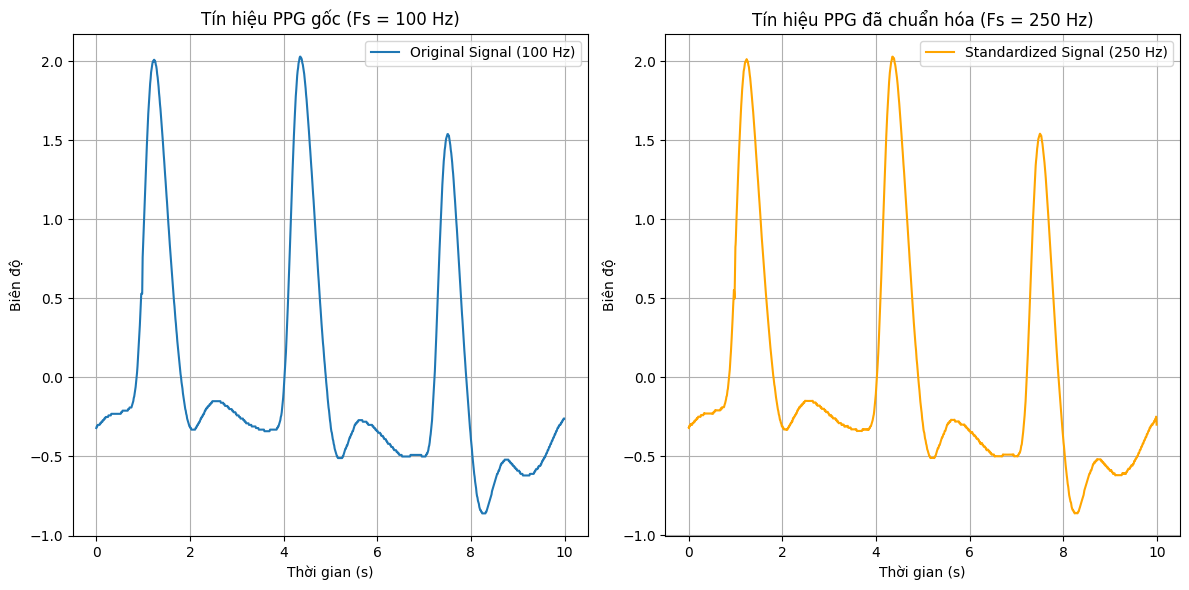

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Paths to the data files ---
# Adjust these paths if necessary based on your 'train_folder' variable
original_data_path = os.path.join(r'/kaggle/working/train_folder/', 'train_data.npz')
standardized_data_path = os.path.join(r'/kaggle/working/train_folder/', 'train_data_standardized.npz')

# --- Load one sample signal BEFORE standardization ---
try:
    original_data = np.load(original_data_path)
    # Let's take the first PPG signal segment
    original_ppg_sample = original_data['ppg'][0]
    # Determine original sampling rate based on length (assuming 10s window)
    original_length = len(original_ppg_sample)
    if abs(original_length - 1250) < abs(original_length - 1000): # Closer to 10s * 125Hz
        original_fs = 125
    else: # Closer to 10s * 100Hz
        original_fs = 100
    original_time_axis = np.arange(original_length) / original_fs
    print(f"Loaded original sample: Length={original_length}, Original Fs={original_fs} Hz")

except FileNotFoundError:
    print(f"Error: Original data file not found at {original_data_path}")
    original_ppg_sample = None

# --- Load the corresponding sample signal AFTER standardization ---
try:
    standardized_data = np.load(standardized_data_path)
    # Take the first PPG signal segment (should correspond to the original first one)
    standardized_ppg_sample = standardized_data['ppg'][0]
    standardized_fs = 250 # Target frequency
    standardized_length = len(standardized_ppg_sample)
    standardized_time_axis = np.arange(standardized_length) / standardized_fs
    print(f"Loaded standardized sample: Length={standardized_length}, Standardized Fs={standardized_fs} Hz")

except FileNotFoundError:
    print(f"Error: Standardized data file not found at {standardized_data_path}")
    standardized_ppg_sample = None

# --- Plotting for comparison (Figure 3.4) ---
if original_ppg_sample is not None and standardized_ppg_sample is not None:
    plt.figure(figsize=(12, 6))

    # Subplot 1: Original Signal
    plt.subplot(1, 2, 1)
    plt.plot(original_time_axis, original_ppg_sample, label=f'Original Signal ({original_fs} Hz)')
    plt.title(f'T√≠n hi·ªáu PPG g·ªëc (Fs = {original_fs} Hz)')
    plt.xlabel('Th·ªùi gian (s)')
    plt.ylabel('Bi√™n ƒë·ªô')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Standardized Signal
    plt.subplot(1, 2, 2)
    plt.plot(standardized_time_axis, standardized_ppg_sample, label=f'Standardized Signal ({standardized_fs} Hz)', color='orange')
    plt.title(f'T√≠n hi·ªáu PPG ƒë√£ chu·∫©n h√≥a (Fs = {standardized_fs} Hz)')
    plt.xlabel('Th·ªùi gian (s)')
    plt.ylabel('Bi√™n ƒë·ªô')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('figure_3_4_resampling_example.png') # Save the figure
    plt.show()
else:
    print("Could not generate plot because one or both data samples failed to load.")

In [12]:
def filter_and_normalize_signal(signal, fs, signal_type, filter_type='bandpass', normalize_method='minmax'):
    """
    L·ªçc nhi·ªÖu v√† chu·∫©n h√≥a bi√™n ƒë·ªô t√≠n hi·ªáu
    Tham s·ªë:
    - signal: M·∫£ng numpy ch·ª©a t√≠n hi·ªáu
    - fs: T·∫ßn s·ªë l·∫•y m·∫´u (Hz)
    - filter_type: Lo·∫°i b·ªô l·ªçc ('bandpass', 'lowpass', 'highpass')
    - normalize_method: Ph∆∞∆°ng ph√°p chu·∫©n h√≥a ('minmax', 'zscore')

    Tr·∫£ v·ªÅ:
    - T√≠n hi·ªáu ƒë√£ l·ªçc v√† chu·∫©n h√≥a
    """
    from scipy import signal as scipy_signal
    import numpy as np

    # L·ªçc nhi·ªÖu
    if filter_type == 'bandpass':
        if signal_type == 'ppg':  # ‚úÖ Fix PPG filtering range
            b, a = scipy_signal.butter(4, [0.5, 8], fs=fs, btype='bandpass')
        else:  # ECG
            b, a = scipy_signal.butter(4, [0.5, 40], fs=fs, btype='bandpass')
    elif filter_type == 'lowpass':
        # L·ªçc th√¥ng th·∫•p 1 Hz (ph√π h·ª£p cho nh·ªãp th·ªü)
        b, a = scipy_signal.butter(4, 1, fs=fs, btype='lowpass')
    elif filter_type == 'highpass':
        # L·ªçc th√¥ng cao 0.5 Hz (lo·∫°i b·ªè trend)
        b, a = scipy_signal.butter(4, 0.5, fs=fs, btype='highpass')
    else:
        filtered_signal = signal  # Kh√¥ng l·ªçc n·∫øu lo·∫°i kh√¥ng h·ª£p l·ªá

    # √Åp d·ª•ng b·ªô l·ªçc n·∫øu c√≥
    if filter_type in ['bandpass', 'lowpass', 'highpass']:
        filtered_signal = scipy_signal.filtfilt(b, a, signal)

    # Ki·ªÉm tra NaN
    if np.isnan(filtered_signal).any():
        print("‚ö†Ô∏è Warning: NaN values detected after filtering! Returning zeros.")
        return np.zeros_like(filtered_signal)

    # Chu·∫©n h√≥a bi√™n ƒë·ªô
    if normalize_method == 'minmax':
        # Chu·∫©n h√≥a Min-Max v√†o kho·∫£ng [-1, 1]
        signal_min = np.min(filtered_signal)
        signal_max = np.max(filtered_signal)
        if signal_max == signal_min:
            print("‚ö†Ô∏è Warning: Constant signal detected, skipping Min-Max normalization.")
            return np.zeros_like(filtered_signal)
        normalized_signal = 2 * (filtered_signal - signal_min) / (signal_max - signal_min) - 1
    elif normalize_method == 'zscore':
        # Chu·∫©n h√≥a Z-score
        signal_mean = np.mean(filtered_signal)
        signal_std = np.std(filtered_signal)
        if signal_std == 0:
            print("‚ö†Ô∏è Warning: Zero standard deviation detected, skipping Z-score normalization.")
            return np.zeros_like(filtered_signal)
        normalized_signal = (filtered_signal - signal_mean) / signal_std
    else:
        normalized_signal = filtered_signal

    return normalized_signal


def preprocess_dataset(data_path, fs=250):
    """
    Ti·ªÅn x·ª≠ l√Ω to√†n b·ªô b·ªô d·ªØ li·ªáu
    Tham s·ªë:
    - data_path: ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu
    - fs: T·∫ßn s·ªë l·∫•y m·∫´u (Hz)

    Tr·∫£ v·ªÅ:
    - ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω
    """
    import numpy as np
    import os
    from tqdm import tqdm

    # ƒê·ªçc d·ªØ li·ªáu
    data = np.load(data_path)
    ppg = data['ppg']
    ecg = data['ecg']
    resp = data['resp']

    # Ti·ªÅn x·ª≠ l√Ω t·ª´ng ph√¢n ƒëo·∫°n
    ppg_processed = []
    ecg_processed = []
    resp_processed = []

    for i in tqdm(range(len(ppg)), desc="üîÑ Ti·ªÅn x·ª≠ l√Ω t√≠n hi·ªáu"):
         # X·ª≠ l√Ω t√≠n hi·ªáu PPG
         ppg_processed.append(filter_and_normalize_signal(
                ppg[i], fs, filter_type='bandpass', normalize_method='zscore', signal_type='ppg'  # ‚úÖ Add signal_type='ppg'
            ))
         # X·ª≠ l√Ω t√≠n hi·ªáu ECG
         ecg_processed.append(filter_and_normalize_signal(
                ecg[i], fs, filter_type='bandpass', normalize_method='minmax', signal_type='ecg'  # ‚úÖ Add signal_type='ecg'
            ))
         # X·ª≠ l√Ω t√≠n hi·ªáu nh·ªãp th·ªü
         resp_processed.append(filter_and_normalize_signal(
                resp[i], fs, filter_type='lowpass', normalize_method='minmax', signal_type='resp'  # ‚úÖ Add signal_type='resp'
            ))

    # Chuy·ªÉn ƒë·ªïi th√†nh m·∫£ng numpy
    ppg_processed = np.array(ppg_processed)
    ecg_processed = np.array(ecg_processed)
    resp_processed = np.array(resp_processed)

    # In th√¥ng tin
    print(f"üìä K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi ti·ªÅn x·ª≠ l√Ω:")
    print(f"   ‚û§ PPG: {ppg_processed.shape}")
    print(f"   ‚û§ ECG: {ecg_processed.shape}")
    print(f"   ‚û§ Nh·ªãp th·ªü: {resp_processed.shape}")

    # L∆∞u d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω
    output_dir = os.path.dirname(data_path)
    output_file = os.path.join(output_dir, os.path.basename(data_path).replace('.npz', '_preprocessed.npz'))
    np.savez_compressed(
        output_file,
        ppg=ppg_processed,
        ecg=ecg_processed,
        resp=resp_processed
    )

    print(f"‚úÖ ƒê√£ l∆∞u d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω t·∫°i: {output_file}")
    return output_file


# Ti·ªÅn x·ª≠ l√Ω t·ª´ng t·∫≠p d·ªØ li·ªáu
train_prep_path = preprocess_dataset(train_std_path)
val_prep_path = preprocess_dataset(val_std_path)
test_prep_path = preprocess_dataset(test_std_path)


üîÑ Ti·ªÅn x·ª≠ l√Ω t√≠n hi·ªáu: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 8385/8385 [00:12<00:00, 665.09it/s]


üìä K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi ti·ªÅn x·ª≠ l√Ω:
   ‚û§ PPG: (8385, 2500)
   ‚û§ ECG: (8385, 2500)
   ‚û§ Nh·ªãp th·ªü: (8385, 2500)
‚úÖ ƒê√£ l∆∞u d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω t·∫°i: /kaggle/working/train_folder/train_data_standardized_preprocessed.npz


üîÑ Ti·ªÅn x·ª≠ l√Ω t√≠n hi·ªáu: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1797/1797 [00:02<00:00, 696.89it/s]


üìä K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi ti·ªÅn x·ª≠ l√Ω:
   ‚û§ PPG: (1797, 2500)
   ‚û§ ECG: (1797, 2500)
   ‚û§ Nh·ªãp th·ªü: (1797, 2500)
‚úÖ ƒê√£ l∆∞u d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω t·∫°i: /kaggle/working/train_folder/val_data_standardized_preprocessed.npz


üîÑ Ti·ªÅn x·ª≠ l√Ω t√≠n hi·ªáu: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1797/1797 [00:02<00:00, 687.95it/s]


üìä K√≠ch th∆∞·ªõc d·ªØ li·ªáu sau khi ti·ªÅn x·ª≠ l√Ω:
   ‚û§ PPG: (1797, 2500)
   ‚û§ ECG: (1797, 2500)
   ‚û§ Nh·ªãp th·ªü: (1797, 2500)
‚úÖ ƒê√£ l∆∞u d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω t·∫°i: /kaggle/working/train_folder/test_data_standardized_preprocessed.npz


In [13]:
import numpy as np
from scipy import signal as scipy_signal
import os
from tqdm import tqdm

def extract_features(signal, fs, signal_type):
    """
    Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ t√≠n hi·ªáu
    Tham s·ªë:
    - signal: M·∫£ng numpy ch·ª©a t√≠n hi·ªáu
    - fs: T·∫ßn s·ªë l·∫•y m·∫´u (Hz)
    - signal_type: Lo·∫°i t√≠n hi·ªáu ('ppg', 'ecg', 'resp')
    Tr·∫£ v·ªÅ:
    - C√°c ƒë·∫∑c tr∆∞ng ƒë√£ tr√≠ch xu·∫•t
    """
    # Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng mi·ªÅn th·ªùi gian
    def extract_time_domain_features(signal):
        mean = np.mean(signal)
        std = np.std(signal)
        min_val = np.min(signal)
        max_val = np.max(signal)
        rms = np.sqrt(np.mean(np.square(signal)))
        zero_crossings = np.sum(np.diff(np.signbit(signal).astype(int)) != 0)
        zcr = zero_crossings / (len(signal) - 1)
        p2p = max_val - min_val
        hist, _ = np.histogram(signal, bins=10, density=True)
        entropy = -np.sum(hist * np.log2(hist + 1e-10))
        return np.array([mean, std, min_val, max_val, rms, zcr, p2p, entropy])

    # Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng mi·ªÅn t·∫ßn s·ªë
    def extract_frequency_domain_features(signal, fs):
        f, Pxx = scipy_signal.welch(signal, fs=fs, nperseg=min(len(signal), 256))
        mean_freq = np.sum(f * Pxx) / np.sum(Pxx) if np.sum(Pxx) > 0 else 0
        median_freq = f[np.where(np.cumsum(Pxx) >= np.sum(Pxx) / 2)[0][0]]
        max_freq = f[np.argmax(Pxx)]
        return np.array([mean_freq, median_freq, max_freq])

    # Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng ƒë·∫∑c th√π theo lo·∫°i t√≠n hi·ªáu
    def extract_signal_specific_features(signal, fs, signal_type):
        peaks, _ = scipy_signal.find_peaks(signal, distance=fs//2)
        peak_count = len(peaks)
        rate = (peak_count / (len(signal) / fs)) * 60 if len(signal) > 0 else 0
        if len(peaks) > 1:
            rr_intervals = np.diff(peaks) / fs
            sdnn = np.std(rr_intervals) if len(rr_intervals) > 1 else 0
            rmssd = np.sqrt(np.mean(np.square(np.diff(rr_intervals)))) if len(rr_intervals) > 2 else 0
        else:
            sdnn, rmssd = 0, 0

        resp_rate = rate if signal_type == 'resp' else 0
        return np.array([peak_count, rate, sdnn, rmssd, resp_rate])

    return np.concatenate([
        extract_time_domain_features(signal),
        extract_frequency_domain_features(signal, fs),
        extract_signal_specific_features(signal, fs, signal_type)
    ])

def extract_features_from_dataset(data_path, fs=250, sample_count=None):
    """
    Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng t·ª´ b·ªô d·ªØ li·ªáu
    Tham s·ªë:
    - data_path: ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu
    - fs: T·∫ßn s·ªë l·∫•y m·∫´u (Hz)
    - sample_count: S·ªë l∆∞·ª£ng m·∫´u c·∫ßn tr√≠ch xu·∫•t (None = to√†n b·ªô)
    Tr·∫£ v·ªÅ:
    - ƒê∆∞·ªùng d·∫´n ƒë·∫øn file ƒë·∫∑c tr∆∞ng ƒë√£ tr√≠ch xu·∫•t
    """
    # ƒê·ªçc d·ªØ li·ªáu
    data = np.load(data_path)
    ppg, ecg, resp = data['ppg'], data['ecg'], data['resp']
    if sample_count is not None:
        sample_count = min(sample_count, len(ppg))
        ppg, ecg, resp = ppg[:sample_count], ecg[:sample_count], resp[:sample_count]

    # Tr√≠ch xu·∫•t ƒë·∫∑c tr∆∞ng
    ppg_features = np.array([extract_features(ppg[i], fs, 'ppg') for i in tqdm(range(len(ppg)), desc="PPG")])
    ecg_features = np.array([extract_features(ecg[i], fs, 'ecg') for i in tqdm(range(len(ecg)), desc="ECG")])
    resp_features = np.array([extract_features(resp[i], fs, 'resp') for i in tqdm(range(len(resp)), desc="RESP")])

    # L∆∞u ƒë·∫∑c tr∆∞ng ƒë√£ tr√≠ch xu·∫•t
    output_file = data_path.replace('.npz', '_features.npz')
    np.savez_compressed(output_file, ppg=ppg, ecg=ecg, resp=resp, ppg_features=ppg_features, ecg_features=ecg_features, resp_features=resp_features)
    print(f"ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng t·∫°i: {output_file}")
    return output_file

train_features_path = extract_features_from_dataset(train_prep_path, sample_count=1000)


RESP: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1000/1000 [00:00<00:00, 1361.97it/s]


ƒê√£ l∆∞u ƒë·∫∑c tr∆∞ng t·∫°i: /kaggle/working/train_folder/train_data_standardized_preprocessed_features.npz


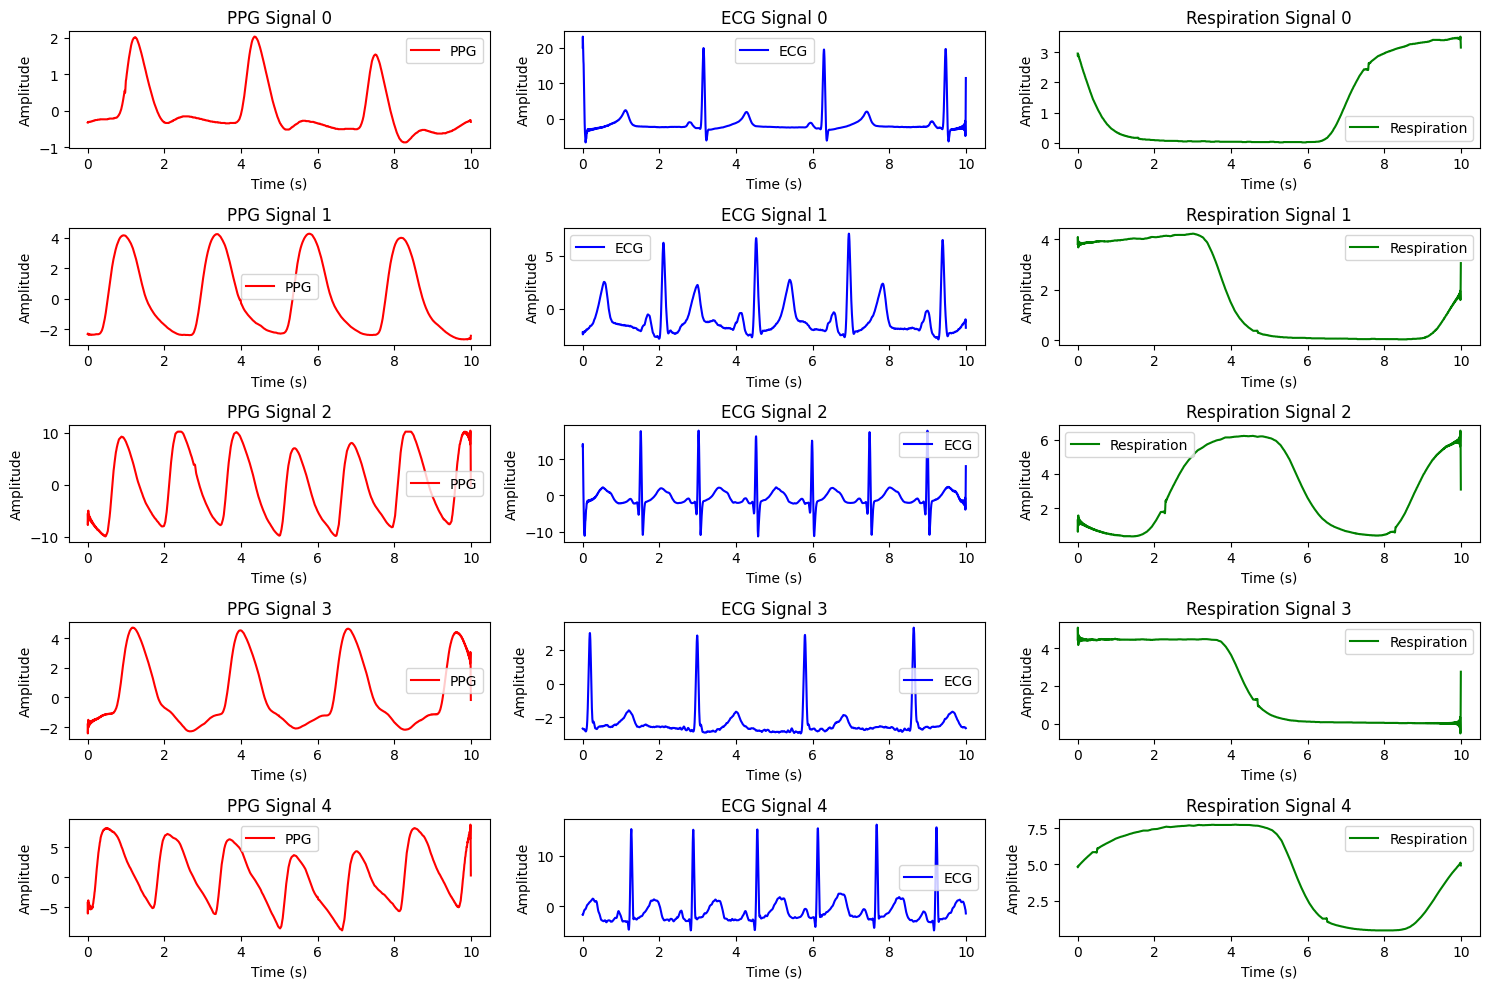

In [14]:
def visualize_signals(data_path, num_samples=5, fs=250):
    data = np.load(data_path)
    ppg, ecg, resp = data['ppg'], data['ecg'], data['resp']

    plt.figure(figsize=(15, 10))
    for i in range(min(num_samples, len(ppg))):
        time = np.arange(len(ppg[i])) / fs

        plt.subplot(num_samples, 3, 3 * i + 1)
        plt.plot(time, ppg[i], label='PPG', color='r')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'PPG Signal {i}')
        plt.legend()

        plt.subplot(num_samples, 3, 3 * i + 2)
        plt.plot(time, ecg[i], label='ECG', color='b')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'ECG Signal {i}')
        plt.legend()

        plt.subplot(num_samples, 3, 3 * i + 3)
        plt.plot(time, resp[i], label='Respiration', color='g')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        plt.title(f'Respiration Signal {i}')
        plt.legend()

    plt.tight_layout()
    plt.show()

visualize_signals(train_std_path)

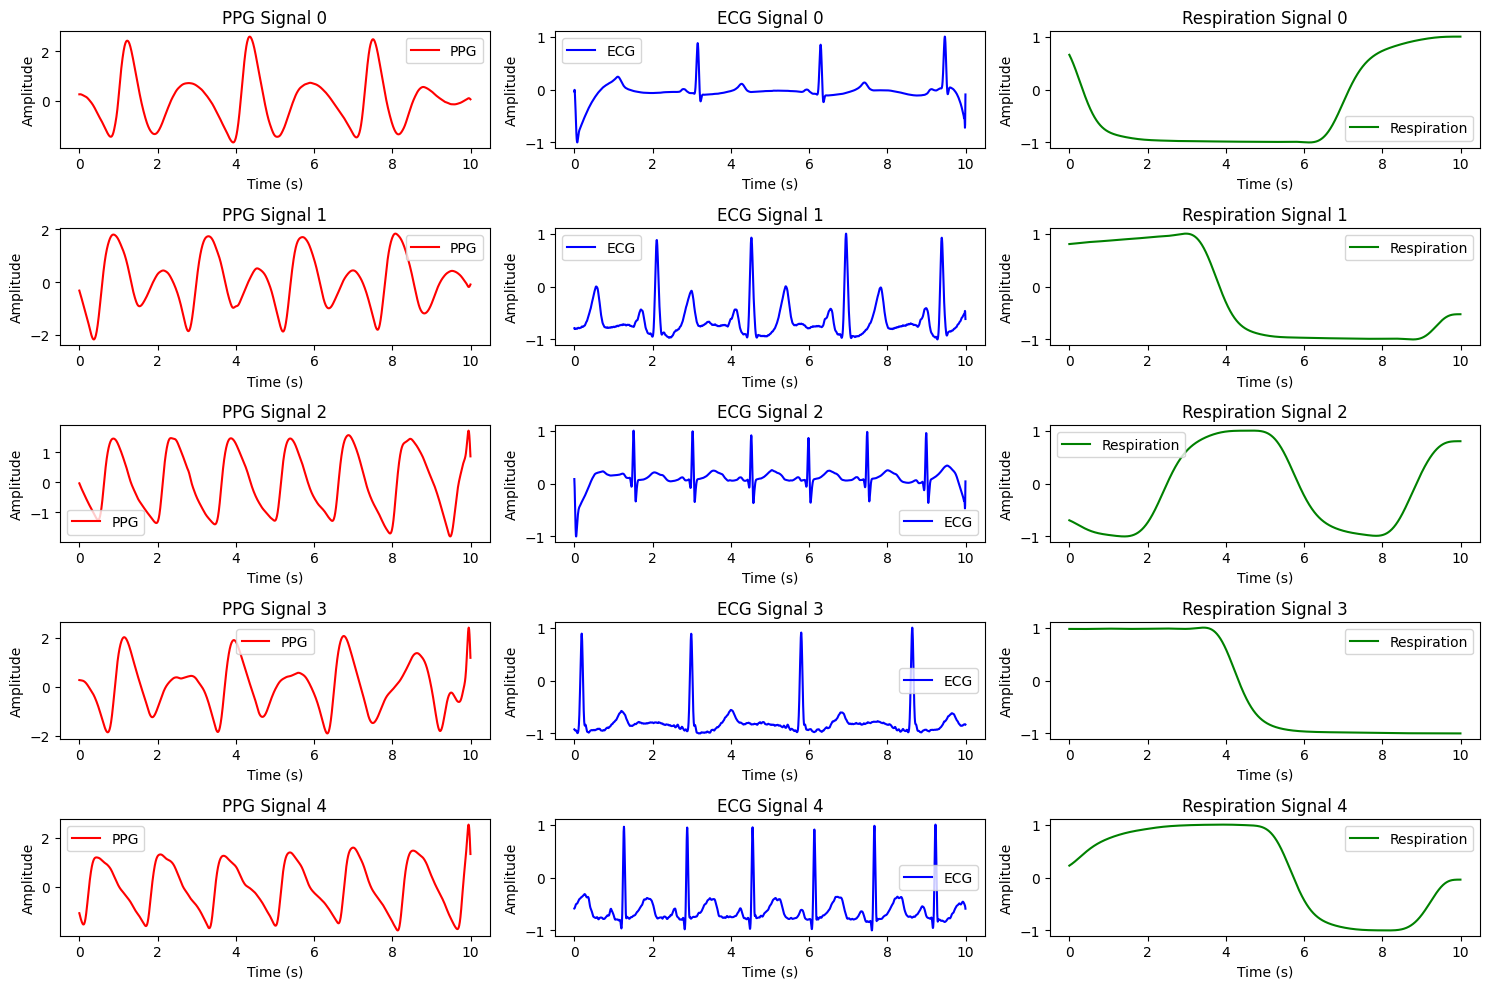

In [15]:
visualize_signals(train_prep_path)

In [16]:
import numpy as np
import os
from tqdm import tqdm

def prepare_data_for_training(data_path, sequence_length=2500):
    """
    Chu·∫©n b·ªã d·ªØ li·ªáu cho vi·ªác hu·∫•n luy·ªán m√¥ h√¨nh t·∫°o sinh.

    Tham s·ªë:
    - data_path: ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu ƒë√£ ti·ªÅn x·ª≠ l√Ω.
    - sequence_length: ƒê·ªô d√†i chu·ªói (s·ªë ƒëi·ªÉm d·ªØ li·ªáu).

    Tr·∫£ v·ªÅ:
    - ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu ƒë√£ chu·∫©n b·ªã.
    """

    # ƒê·ªçc d·ªØ li·ªáu
    data = np.load(data_path)
    ppg = data['ppg']
    ecg = data['ecg']
    resp = data['resp']

    # ƒê·∫£m b·∫£o t·∫•t c·∫£ c√°c t√≠n hi·ªáu c√≥ c√πng ƒë·ªô d√†i
    min_length = min(ppg.shape[1], ecg.shape[1], resp.shape[1])

    # C·∫Øt ho·∫∑c ƒë·ªám d·ªØ li·ªáu theo sequence_length
    if min_length >= sequence_length:
        ppg_cut = ppg[:, :sequence_length]
        ecg_cut = ecg[:, :sequence_length]
        resp_cut = resp[:, :sequence_length]
    else:
        # Padding n·∫øu ƒë·ªô d√†i nh·ªè h∆°n sequence_length
        ppg_cut = np.zeros((ppg.shape[0], sequence_length))
        ecg_cut = np.zeros((ecg.shape[0], sequence_length))
        resp_cut = np.zeros((resp.shape[0], sequence_length))

        ppg_cut[:, :min_length] = ppg[:, :min_length]
        ecg_cut[:, :min_length] = ecg[:, :min_length]
        resp_cut[:, :min_length] = resp[:, :min_length]

    # Th√™m chi·ªÅu k√™nh (c·∫ßn thi·∫øt cho m√¥ h√¨nh CNN)
    ppg_input = ppg_cut.reshape(ppg_cut.shape[0], ppg_cut.shape[1], 1)
    ecg_target = ecg_cut.reshape(ecg_cut.shape[0], ecg_cut.shape[1], 1)
    resp_target = resp_cut.reshape(resp_cut.shape[0], resp_cut.shape[1], 1)

    # In th√¥ng tin k√≠ch th∆∞·ªõc d·ªØ li·ªáu
    print(f"K√≠ch th∆∞·ªõc d·ªØ li·ªáu hu·∫•n luy·ªán:")
    print(f"PPG (ƒë·∫ßu v√†o): {ppg_input.shape}")
    print(f"ECG (ƒë·∫ßu ra): {ecg_target.shape}")
    print(f"Nh·ªãp th·ªü (ƒë·∫ßu ra): {resp_target.shape}")

    # L∆∞u d·ªØ li·ªáu ƒë√£ chu·∫©n b·ªã
    output_dir = os.path.dirname(data_path)
    output_file = os.path.join(output_dir, os.path.basename(data_path).replace('.npz', '_training.npz'))

    np.savez_compressed(output_file, ppg_input=ppg_input, ecg_target=ecg_target, resp_target=resp_target)

    print(f"ƒê√£ l∆∞u d·ªØ li·ªáu hu·∫•n luy·ªán t·∫°i: {output_file}")

    return output_file

# Chu·∫©n b·ªã d·ªØ li·ªáu hu·∫•n luy·ªán
train_ready_path = prepare_data_for_training(train_prep_path)
val_ready_path = prepare_data_for_training(val_prep_path)
test_ready_path = prepare_data_for_training(test_prep_path)


K√≠ch th∆∞·ªõc d·ªØ li·ªáu hu·∫•n luy·ªán:
PPG (ƒë·∫ßu v√†o): (8385, 2500, 1)
ECG (ƒë·∫ßu ra): (8385, 2500, 1)
Nh·ªãp th·ªü (ƒë·∫ßu ra): (8385, 2500, 1)
ƒê√£ l∆∞u d·ªØ li·ªáu hu·∫•n luy·ªán t·∫°i: /kaggle/working/train_folder/train_data_standardized_preprocessed_training.npz
K√≠ch th∆∞·ªõc d·ªØ li·ªáu hu·∫•n luy·ªán:
PPG (ƒë·∫ßu v√†o): (1797, 2500, 1)
ECG (ƒë·∫ßu ra): (1797, 2500, 1)
Nh·ªãp th·ªü (ƒë·∫ßu ra): (1797, 2500, 1)
ƒê√£ l∆∞u d·ªØ li·ªáu hu·∫•n luy·ªán t·∫°i: /kaggle/working/train_folder/val_data_standardized_preprocessed_training.npz
K√≠ch th∆∞·ªõc d·ªØ li·ªáu hu·∫•n luy·ªán:
PPG (ƒë·∫ßu v√†o): (1797, 2500, 1)
ECG (ƒë·∫ßu ra): (1797, 2500, 1)
Nh·ªãp th·ªü (ƒë·∫ßu ra): (1797, 2500, 1)
ƒê√£ l∆∞u d·ªØ li·ªáu hu·∫•n luy·ªán t·∫°i: /kaggle/working/train_folder/test_data_standardized_preprocessed_training.npz


In [17]:
import os
train_folder = r"/kaggle/working/train_folder/"
train_ready_path = os.path.join(train_folder,"train_data_standardized_preprocessed_training.npz")
val_ready_path = os.path.join(train_folder,"val_data_standardized_preprocessed_training.npz")
test_ready_path = os.path.join(train_folder,"test_data_standardized_preprocessed_training.npz")

In [18]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np

class BioSignalDataset(Dataset):
    """
    L·ªõp Dataset cho d·ªØ li·ªáu t√≠n hi·ªáu sinh h·ªçc.
    """

    def __init__(self, data_path):
        # ƒê·ªçc d·ªØ li·ªáu
        data = np.load(data_path)
        self.ppg_input = torch.tensor(data['ppg_input'], dtype=torch.float32)
        self.ecg_target = torch.tensor(data['ecg_target'], dtype=torch.float32)
        self.resp_target = torch.tensor(data['resp_target'], dtype=torch.float32)
        self.num_samples = self.ppg_input.shape[0]
        print(data['ppg_input'].shape)
        print(data['ecg_target'].shape)
        print(data['resp_target'].shape)


    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return {
            'ppg': self.ppg_input[idx],
            'ecg': self.ecg_target[idx],
            'resp': self.resp_target[idx]
        }

def create_dataloaders(train_path, val_path, test_path, batch_size=32):
    """
    T·∫°o DataLoader cho t·∫≠p hu·∫•n luy·ªán, x√°c th·ª±c v√† ki·ªÉm tra.

    Tham s·ªë:
    - train_path, val_path, test_path: ƒê∆∞·ªùng d·∫´n ƒë·∫øn file d·ªØ li·ªáu.
    - batch_size: K√≠ch th∆∞·ªõc batch.

    Tr·∫£ v·ªÅ:
    - train_loader, val_loader, test_loader: DataLoader.
    """

    # T·∫°o Dataset
    train_dataset = BioSignalDataset(train_path)
    val_dataset = BioSignalDataset(val_path)
    test_dataset = BioSignalDataset(test_path)

    # T·∫°o DataLoader
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)

    return train_loader, val_loader, test_loader

# T·∫°o DataLoader
train_loader, val_loader, test_loader = create_dataloaders(
    train_ready_path, val_ready_path, test_ready_path, batch_size=16
)
train_loader_32, val_loader_32, test_loader_32 = create_dataloaders(
    train_ready_path, val_ready_path, test_ready_path, batch_size=32
)

(8385, 2500, 1)
(8385, 2500, 1)
(8385, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(8385, 2500, 1)
(8385, 2500, 1)
(8385, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)
(1797, 2500, 1)


In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F
!pip install pytorch_msssim
import pytorch_msssim  # For SSIM loss

class DoubleConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(out_channels)
        self.conv2 = nn.Conv1d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(out_channels)
        self.se = nn.Identity()  # Placeholder for Squeeze-Excitation block

        self.residual_conv = None
        if in_channels != out_channels:
            self.residual_conv = nn.Conv1d(in_channels, out_channels, kernel_size=1)

    def forward(self, x):
        residual = x
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.bn2(self.conv2(x))
        x = self.se(x)

        if self.residual_conv:
            residual = self.residual_conv(residual)

        return F.relu(x + residual)

class DualUNet(nn.Module):
    def __init__(self, in_channels=1, ecg_channels=1, resp_channels=1):
        super(DualUNet, self).__init__()

        self.encoder = nn.Sequential(
            DoubleConv(in_channels, 64),
            nn.MaxPool1d(kernel_size=2, stride=2),
            DoubleConv(64, 128),
            nn.MaxPool1d(kernel_size=2, stride=2),
            DoubleConv(128, 256),
            nn.MaxPool1d(kernel_size=2, stride=2),
            DoubleConv(256, 512),
        )

        self.ecg_decoder = self._make_decoder(512, ecg_channels)
        self.resp_decoder = self._make_decoder(512, resp_channels)

    def _make_decoder(self, in_channels, out_channels):
        return nn.Sequential(
            nn.ConvTranspose1d(in_channels, 256, kernel_size=2, stride=2),
            DoubleConv(256, 128),
            nn.ConvTranspose1d(128, 64, kernel_size=2, stride=2),
            DoubleConv(64, 64),
            nn.ConvTranspose1d(64, 32, kernel_size=2, stride=2),
            DoubleConv(32, 32),
            nn.Conv1d(32, out_channels, kernel_size=1)
        )

    def forward(self, x):
        original_length = x.shape[2]
        x = self.pad_to_multiple(x, 8)
        features = self.encoder(x)
        ecg = self.crop_to_length(self.ecg_decoder(features), original_length)
        resp = self.crop_to_length(self.resp_decoder(features), original_length)
        return ecg, resp

    @staticmethod
    def pad_to_multiple(x, multiple=8):
        pad_len = (multiple - x.shape[2] % multiple) % multiple
        return F.pad(x, (0, pad_len))

    @staticmethod
    def crop_to_length(x, target_length):
        return x[:, :, :target_length]

class CustomLoss(nn.Module):
    def __init__(self, alpha=0.8, beta=0.2, l1_weight=0.01):
        super(CustomLoss, self).__init__()
        self.alpha = alpha
        self.beta = beta
        self.l1_weight = l1_weight
        self.ssim_loss = pytorch_msssim.SSIM(data_range=1.0, size_average=True, channel=1)

    def forward(self, ecg_pred, ecg_target, resp_pred, resp_target):
        mse_ecg = F.mse_loss(ecg_pred, ecg_target)
        mse_resp = F.mse_loss(resp_pred, resp_target)

        ssim_ecg = 1 - self.ssim_loss(ecg_pred, ecg_target)
        ssim_resp = 1 - self.ssim_loss(resp_pred, resp_target)

        l1_reg = (ecg_pred.abs().mean() + resp_pred.abs().mean()) * self.l1_weight

        loss = self.alpha * (mse_ecg + mse_resp) + self.beta * (ssim_ecg + ssim_resp) + l1_reg
        return loss


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

class Generator(nn.Module):
    """
    M√¥ h√¨nh Generator cho GAN - t·∫°o sinh ECG v√† nh·ªãp th·ªü t·ª´ PPG.
    """
    def __init__(self, in_channels=1, latent_dim=100, out_channels=1):
        super(Generator, self).__init__()

        # Ph·∫ßn x·ª≠ l√Ω t√≠n hi·ªáu PPG
        self.ppg_encoder = nn.Sequential(
            nn.Conv1d(in_channels, 64, kernel_size=7, stride=1, padding=3),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(128, 256, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv1d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True)
        )

        # Ph·∫ßn x·ª≠ l√Ω nhi·ªÖu ng·∫´u nhi√™n
        self.latent_processor = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.LeakyReLU(0.2, inplace=True)
        )

        # Ph·∫ßn t·∫°o sinh ECG
        self.ecg_decoder = nn.Sequential(
        nn.ConvTranspose1d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=0),
        nn.BatchNorm1d(256),
        nn.ReLU(inplace=True),
        nn.ConvTranspose1d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),
        nn.BatchNorm1d(128),
        nn.ReLU(inplace=True),
        nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1, output_padding=0),
        nn.BatchNorm1d(64),
        nn.ReLU(inplace=True),
        nn.Conv1d(64, out_channels, kernel_size=7, stride=1, padding=3),
        nn.Tanh()
        )

        # Ph·∫ßn t·∫°o sinh nh·ªãp th·ªü
        self.resp_decoder = nn.Sequential(
        nn.ConvTranspose1d(512, 256, kernel_size=4, stride=2, padding=1, output_padding=0),
        nn.BatchNorm1d(256),
        nn.ReLU(inplace=True),
        nn.ConvTranspose1d(256, 128, kernel_size=4, stride=2, padding=1, output_padding=0),
        nn.BatchNorm1d(128),
        nn.ReLU(inplace=True),
        nn.ConvTranspose1d(128, 64, kernel_size=4, stride=2, padding=1, output_padding=0),
        nn.BatchNorm1d(64),
        nn.ReLU(inplace=True),
        nn.Conv1d(64, out_channels, kernel_size=7, stride=1, padding=3),
        nn.Tanh()
        )


    def forward(self, ppg, noise=None):
        # M√£ h√≥a PPG
        ppg_features = self.ppg_encoder(ppg)

        # K·∫øt h·ª£p v·ªõi nhi·ªÖu n·∫øu c√≥
        if noise is not None:
            latent_features = self.latent_processor(noise)
            latent_features = latent_features.unsqueeze(2).expand(-1, -1, ppg_features.size(2))
            features = ppg_features + latent_features
        else:
            features = ppg_features

        # Gi·∫£i m√£ th√†nh ECG v√† nh·ªãp th·ªü
        ecg = self.ecg_decoder(features)
        resp = self.resp_decoder(features)
        pool = nn.AdaptiveAvgPool1d(2500)
        ecg = pool(ecg)
        resp = pool(resp)
        return ecg, resp

class Discriminator(nn.Module):
    """
    M√¥ h√¨nh Discriminator cho GAN - ph√¢n bi·ªát t√≠n hi·ªáu th·∫≠t/gi·∫£.
    """
    def __init__(self, in_channels=3):  # 3 = PPG + ECG + Resp
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(
            # Layer 1
            nn.Conv1d(in_channels, 64, kernel_size=7, stride=2, padding=3),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 2
            nn.Conv1d(64, 128, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 3
            nn.Conv1d(128, 256, kernel_size=5, stride=2, padding=2),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 4
            nn.Conv1d(256, 512, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm1d(512),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 5 (Output)
            nn.Conv1d(512, 1, kernel_size=3, stride=1, padding=1),
        )
        self.pool = nn.AdaptiveAvgPool1d(312)  # Dynamically set output length
        self.main.add_module("sigmoid", nn.Sigmoid())

    def forward(self, ppg, ecg, resp):
        # Gh√©p c√°c ƒë·∫ßu v√†o l·∫°i v·ªõi nhau

        x = torch.cat((ppg, ecg, resp), dim=1)
        x = self.main(x)
        x = self.pool(x)
        return x

import torch
import torch.nn as nn

class GeneratorLSTM(nn.Module):
    """
    LSTM Generator Model for time-series signal synthesis.
    Predicts both ECG and Resp signals from PPG input.
    """

    def __init__(self, input_size: int = 1, hidden_size: int = 128, num_layers: int = 2,
                 dropout: float = 0.1, output_size: int = 1, bidirectional: bool = False):
        super(GeneratorLSTM, self).__init__()

        # Factor for bidirectional LSTM (1 if False, 2 if True)
        factor = 2 if bidirectional else 1

        # LSTM Layer
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            dropout=dropout if num_layers > 1 else 0,  # Avoid dropout for single-layer LSTM
            batch_first=True,
            bidirectional=bidirectional
        )

        # ECG Output Layer
        self.ecg_fc = nn.Sequential(
            nn.Linear(hidden_size * factor, hidden_size),  # Adjusted for bidirectionality
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

        # Respiration Output Layer
        self.resp_fc = nn.Sequential(
            nn.Linear(hidden_size * factor, hidden_size),  # Adjusted for bidirectionality
            nn.ReLU(),
            nn.Linear(hidden_size, output_size)
        )

    def forward(self, x: torch.Tensor) -> tuple[torch.Tensor, torch.Tensor]:
        """
        Forward pass of the model.

        Args:
            x (Tensor): Input tensor of shape (batch_size, seq_len, input_size)

        Returns:
            ecg (Tensor): Predicted ECG signal (batch_size, seq_len, output_size)
            resp (Tensor): Predicted Resp signal (batch_size, seq_len, output_size)
        """
        # LSTM processing
        lstm_out, _ = self.lstm(x)  # Output shape: (batch_size, seq_len, hidden_size * factor)

        # Predict ECG and Resp from LSTM features
        ecg = self.ecg_fc(lstm_out)  # Output shape: (batch_size, seq_len, output_size)
        resp = self.resp_fc(lstm_out)

        return ecg, resp




In [21]:
def initialize_models(model_type='unet'):
    """
    Kh·ªüi t·∫°o m√¥ h√¨nh d·ª±a tr√™n lo·∫°i
    Tham s·ªë:
    - model_type: Lo·∫°i m√¥ h√¨nh ('unet', 'gan', 'lstm')
    Tr·∫£ v·ªÅ:
    - C√°c m√¥ h√¨nh v√† t·ªëi ∆∞u h√≥a t∆∞∆°ng ·ª©ng
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    if model_type == 'unet':
        # Kh·ªüi t·∫°o m√¥ h√¨nh UNet k√©p
        model = DualUNet().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()
        return model, optimizer, criterion

    elif model_type == 'gan':
        # Kh·ªüi t·∫°o Generator v√† Discriminator
        latent_dim = 100
        generator = Generator(latent_dim=latent_dim).to(device)
        discriminator = Discriminator().to(device)

        # T·ªëi ∆∞u h√≥a
        g_optimizer = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        d_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

        # H√†m m·∫•t m√°t
        adversarial_loss = nn.BCEWithLogitsLoss()
        reconstruction_loss = nn.L1Loss()

        return generator, discriminator, g_optimizer, d_optimizer, adversarial_loss, reconstruction_loss, latent_dim

    elif model_type == 'lstm':
        # Kh·ªüi t·∫°o m√¥ h√¨nh LSTM
        model = GeneratorLSTM().to(device)
        optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
        criterion = nn.MSELoss()
        return model, optimizer, criterion

    else:
        raise ValueError(f"Lo·∫°i m√¥ h√¨nh kh√¥ng h·ªó tr·ª£: {model_type}")

# Kh·ªüi t·∫°o m√¥ h√¨nh U-Net
unet_model, unet_optimizer, unet_criterion = initialize_models('unet')

# Kh·ªüi t·∫°o m√¥ h√¨nh GAN
gan_generator, gan_discriminator, g_optimizer, d_optimizer, adversarial_loss, reconstruction_loss, latent_dim = initialize_models('gan')

# Kh·ªüi t·∫°o m√¥ h√¨nh LSTM
lstm_model, lstm_optimizer, lstm_criterion = initialize_models('lstm')

import os
models_path = os.path.join(r"/kaggle/working/train_folder/models")


In [22]:
import torch.optim.lr_scheduler as lr_scheduler
import matplotlib.pyplot as plt
from tqdm import tqdm
import torch
import torch.nn as nn

def train_unet(
    model, optimizer, criterion, train_loader, val_loader,
    num_epochs=50, device=None, save_path="models/unet_model.pth", scheduler=None, models_path = r'/kaggle/working/train_folder/models'
):
    """
    Train the U-Net model with a learning rate scheduler.

    Args:
    - model: The U-Net model
    - optimizer: Optimizer for training
    - criterion: Loss function
    - train_loader: DataLoader for training
    - val_loader: DataLoader for validation
    - num_epochs: Number of epochs (default: 50)
    - device: Training device (CPU or GPU)
    - save_path: Path to save the best model
    - scheduler: Learning rate scheduler (optional)
    """

    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    train_losses, val_losses = [], []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0

        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            ppg = batch['ppg'].to(device).permute(0, 2, 1)
            ecg = batch['ecg'].to(device).permute(0, 2, 1)
            resp = batch['resp'].to(device).permute(0, 2, 1)

            optimizer.zero_grad()
            ecg_pred, resp_pred = model(ppg)

            loss = criterion(ecg_pred, ecg) + criterion(resp_pred, resp)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        if scheduler:
            scheduler.step()

        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                ppg = batch['ppg'].to(device).permute(0, 2, 1)
                ecg = batch['ecg'].to(device).permute(0, 2, 1)
                resp = batch['resp'].to(device).permute(0, 2, 1)

                ecg_pred, resp_pred = model(ppg)
                loss = criterion(ecg_pred, ecg) + criterion(resp_pred, resp)
                val_loss += loss.item()

        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{num_epochs}], LR: {current_lr:.6e}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), save_path)
            print(f"‚úÖ Model saved to {save_path}")

    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(os.path.join(models_path,'unet_training_loss.png'))
    plt.show()

    return train_losses, val_losses


In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

def train_lstm(model, optimizer, criterion, train_loader, val_loader,
               num_epochs=50, device=None, save_path="models/lstm_model.pth", scheduler=None, models_path = r'/kaggle/working/train_folder/models'):
    """
    Hu·∫•n luy·ªán m√¥ h√¨nh LSTM v·ªõi learning rate scheduler.

    Tham s·ªë:
    - model: M√¥ h√¨nh LSTM c·∫ßn hu·∫•n luy·ªán.
    - optimizer: B·ªô t·ªëi ∆∞u h√≥a (Adam, SGD, v.v.).
    - criterion: H√†m m·∫•t m√°t (MSELoss, L1Loss, v.v.).
    - train_loader: DataLoader cho t·∫≠p hu·∫•n luy·ªán.
    - val_loader: DataLoader cho t·∫≠p validation.
    - num_epochs: S·ªë l∆∞·ª£ng epoch ƒë·ªÉ hu·∫•n luy·ªán.
    - device: Thi·∫øt b·ªã t√≠nh to√°n (CPU/GPU).
    - save_path: ƒê∆∞·ªùng d·∫´n l∆∞u m√¥ h√¨nh t·ªët nh·∫•t.
    - scheduler: B·ªô ƒëi·ªÅu ch·ªânh learning rate (tu·ª≥ ch·ªçn).

    Tr·∫£ v·ªÅ:
    - train_losses: Danh s√°ch loss hu·∫•n luy·ªán theo epoch.
    - val_losses: Danh s√°ch loss validation theo epoch.
    """

    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)

    # L∆∞u l·ªãch s·ª≠ hu·∫•n luy·ªán
    train_losses = []
    val_losses = []
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        # ----- Hu·∫•n luy·ªán -----
        model.train()
        train_loss = 0.0

        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            # L·∫•y d·ªØ li·ªáu
            ppg = batch['ppg'].to(device)  # (batch_size, sequence_length, 1)
            ecg = batch['ecg'].to(device)
            resp = batch['resp'].to(device)

            # Forward pass
            optimizer.zero_grad()
            ecg_pred, resp_pred = model(ppg)

            # T√≠nh loss
            ecg_loss = criterion(ecg_pred, ecg)
            resp_loss = criterion(resp_pred, resp)
            loss = ecg_loss + resp_loss

            # Backward pass v√† t·ªëi ∆∞u h√≥a
            loss.backward()
            optimizer.step()

            train_loss += loss.item()

        # C·∫≠p nh·∫≠t learning rate n·∫øu c√≥ scheduler
        if scheduler:
            scheduler.step()

        # T√≠nh loss trung b√¨nh
        train_loss /= len(train_loader)
        train_losses.append(train_loss)

        # ----- ƒê√°nh gi√° -----
        model.eval()
        val_loss = 0.0

        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                # L·∫•y d·ªØ li·ªáu
                ppg = batch['ppg'].to(device)
                ecg = batch['ecg'].to(device)
                resp = batch['resp'].to(device)

                # Forward pass
                ecg_pred, resp_pred = model(ppg)

                # T√≠nh loss
                ecg_loss = criterion(ecg_pred, ecg)
                resp_loss = criterion(resp_pred, resp)
                loss = ecg_loss + resp_loss

                val_loss += loss.item()

        # T√≠nh loss trung b√¨nh
        val_loss /= len(val_loader)
        val_losses.append(val_loss)

        # In ti·∫øn tr√¨nh
        current_lr = optimizer.param_groups[0]['lr']
        print(f"Epoch [{epoch+1}/{num_epochs}], LR: {current_lr:.6e}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}")

        # L∆∞u m√¥ h√¨nh t·ªët nh·∫•t
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            torch.save(model.state_dict(), save_path)
            print(f"‚úÖ Model saved to {save_path}")

    # V·∫Ω ƒë·ªì th·ªã loss
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.savefig(os.path.join(models_path,'ltms_training_loss.png'))
    plt.show()

    return train_losses, val_losses



In [24]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

def train_gan(generator, discriminator, g_optimizer, d_optimizer,
              adversarial_loss, reconstruction_loss,
              latent_dim, train_loader, val_loader, num_epochs=50, device=None,
              save_path="models/gan_model.pth",models_path = r'/kaggle/working/train_folder/models'):
    """
    Hu·∫•n luy·ªán m√¥ h√¨nh GAN

    Tham s·ªë:
    - generator, discriminator: M√¥ h√¨nh Generator v√† Discriminator
    - g_optimizer, d_optimizer: T·ªëi ∆∞u h√≥a cho Generator v√† Discriminator
    - adversarial_loss, reconstruction_loss: H√†m m·∫•t m√°t
    - latent_dim: K√≠ch th∆∞·ªõc vector nhi·ªÖu
    - train_loader, val_loader: DataLoader
    - num_epochs: S·ªë epoch
    - device: Thi·∫øt b·ªã t√≠nh to√°n
    - save_path: ƒê∆∞·ªùng d·∫´n l∆∞u m√¥ h√¨nh
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # L∆∞u l·ªãch s·ª≠ hu·∫•n luy·ªán
    d_losses, g_losses, val_losses = [], [], []
    best_val_loss = float('inf')
    real_label, fake_label = 1.0, 0.0

    for epoch in range(num_epochs):
        generator.train()
        discriminator.train()
        d_loss_epoch, g_loss_epoch = 0.0, 0.0

        for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Training"):
            ppg = batch['ppg'].to(device)  # (batch_size, sequence_length, 1)
            ecg = batch['ecg'].to(device)
            resp = batch['resp'].to(device)

            ppg = ppg.permute(0, 2, 1)  # (batch_size, 1, sequence_length)
            ecg = ecg.permute(0, 2, 1)
            resp = resp.permute(0, 2, 1)
            batch_size = ppg.size(0)

            # Hu·∫•n luy·ªán Discriminator
            d_optimizer.zero_grad()
            real_labels = torch.full((batch_size, 1, ppg.size(2) // 8), 0.9, device=device)
            fake_labels = torch.full((batch_size, 1, ppg.size(2) // 8), 0.1, device=device)

            real_output = discriminator(ppg, ecg, resp)
            d_real_loss = adversarial_loss(real_output, real_labels)

            noise = torch.randn(batch_size, latent_dim, device=device)
            fake_ecg, fake_resp = generator(ppg, noise)

            fake_output = discriminator(ppg, fake_ecg.detach(), fake_resp.detach())
            d_fake_loss = adversarial_loss(fake_output, fake_labels)

            d_loss = d_real_loss + d_fake_loss
            d_loss.backward()
            d_optimizer.step()

            # Hu·∫•n luy·ªán Generator
            g_optimizer.zero_grad()
            fake_output = discriminator(ppg, fake_ecg, fake_resp)
            g_adv_loss = adversarial_loss(fake_output, real_labels)

            g_rec_ecg_loss = reconstruction_loss(fake_ecg, ecg)
            g_rec_resp_loss = reconstruction_loss(fake_resp, resp)
            g_rec_loss = g_rec_ecg_loss + g_rec_resp_loss

            lambda_rec = 0.5
            g_loss = g_adv_loss + lambda_rec * g_rec_loss
            g_loss.backward()
            g_optimizer.step()

            d_loss_epoch += d_loss.item()
            g_loss_epoch += g_loss.item()

        d_losses.append(d_loss_epoch / len(train_loader))
        g_losses.append(g_loss_epoch / len(train_loader))

        # ƒê√°nh gi√°
        generator.eval()
        val_loss = 0.0
        with torch.no_grad():
            for batch in tqdm(val_loader, desc=f"Epoch {epoch+1}/{num_epochs} - Validation"):
                ppg = batch['ppg'].to(device)
                ecg = batch['ecg'].to(device)
                resp = batch['resp'].to(device)

                ppg = ppg.permute(0, 2, 1)
                ecg = ecg.permute(0, 2, 1)
                resp = resp.permute(0, 2, 1)

                fake_ecg, fake_resp = generator(ppg)

                ecg_loss = reconstruction_loss(fake_ecg, ecg)
                resp_loss = reconstruction_loss(fake_resp, resp)
                loss = ecg_loss + resp_loss
                val_loss += loss.item()

        val_losses.append(val_loss / len(val_loader))

        print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_losses[-1]:.6f}, G Loss: {g_losses[-1]:.6f}, Val Loss: {val_losses[-1]:.6f}")

        if val_losses[-1] < best_val_loss:
            best_val_loss = val_losses[-1]
            torch.save({
                'generator': generator.state_dict(),
                'discriminator': discriminator.state_dict(),
            }, save_path)
            print(f"Model saved to {save_path}")

    # V·∫Ω ƒë·ªì th·ªã loss
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(d_losses, label='Discriminator Loss')
    plt.plot(g_losses, label='Generator Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Adversarial Training Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.savefig(os.path.join(models_path,'gan_training_loss.png'))
    plt.show()

    return d_losses, g_losses, val_losses

In [25]:
import os
import torch
import torch.nn as nn
import torch.optim.lr_scheduler as lr_scheduler
import torch.nn.functional as F

# Define paths and create necessary directories
models_path = os.path.join(r"/kaggle/working/train_folder/", "models")
os.makedirs(models_path, exist_ok=True)
print(f"‚úÖ Models folder created at: {models_path}")

# Ki·ªÉm tra s·ªë l∆∞·ª£ng GPU c√≥ s·∫µn
num_gpus = torch.cuda.device_count()
print("S·ªë GPU c√≥ s·∫µn:", num_gpus)

# N·∫øu c√≥ h∆°n 1 GPU, b·ªçc c√°c m√¥ h√¨nh b·∫±ng DataParallel
if num_gpus > 1:
    unet_model = nn.DataParallel(unet_model)
    gan_generator = nn.DataParallel(gan_generator)
    gan_discriminator = nn.DataParallel(gan_discriminator)
    lstm_model = nn.DataParallel(lstm_model)

# Chuy·ªÉn c√°c m√¥ h√¨nh sang GPU
unet_model = unet_model.to('cuda')
gan_generator = gan_generator.to('cuda')
gan_discriminator = gan_discriminator.to('cuda')
lstm_model = lstm_model.to('cuda')

# Define training epochs
UNET_EPOCHS = 100
GAN_EPOCHS = 150
LSTM_EPOCHS = 250

# Learning rate schedulers
unet_scheduler = lr_scheduler.CosineAnnealingLR(unet_optimizer, T_max=UNET_EPOCHS)
lstm_scheduler = lr_scheduler.CosineAnnealingLR(lstm_optimizer, T_max=LSTM_EPOCHS)

# Train U-Net model
print("üîÑ Training U-Net...")
unet_train_losses, unet_val_losses = train_unet(
    model=unet_model,
    optimizer=unet_optimizer,
    criterion=unet_criterion,
    train_loader=train_loader,
    val_loader=val_loader,
    num_epochs=UNET_EPOCHS,
    save_path=os.path.join(models_path, "unet_model.pth"),
    scheduler=unet_scheduler
)

# Train GAN model
print("\nƒêang hu·∫•n luy·ªán m√¥ h√¨nh GAN...")
gan_d_losses, gan_g_losses, gan_val_losses = train_gan(
    gan_generator, gan_discriminator,
    g_optimizer, d_optimizer,
    adversarial_loss, reconstruction_loss, latent_dim,
    train_loader, val_loader,
    num_epochs=GAN_EPOCHS,
    save_path=os.path.join(models_path, "gan_model.pth")
)

# Train LSTM model
print("\nüîÑ ƒêang hu·∫•n luy·ªán m√¥ h√¨nh LSTM...")
lstm_train_losses, lstm_val_losses = train_lstm(
    lstm_model, lstm_optimizer, lstm_criterion,
    train_loader_32, val_loader_32,
    num_epochs=LSTM_EPOCHS,
    save_path=os.path.join(models_path, "newlstm_model.pth"),
    scheduler=lstm_scheduler
)


‚úÖ Models folder created at: /kaggle/working/train_folder/models
S·ªë GPU c√≥ s·∫µn: 2
üîÑ Training U-Net...


Epoch 1/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:03<00:00, 28.29it/s]


Epoch [1/100], LR: 9.997533e-04, Train Loss: 0.803859, Val Loss: 0.802327
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 2/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:03<00:00, 28.57it/s]


Epoch [2/100], LR: 9.990134e-04, Train Loss: 0.796890, Val Loss: 0.801817
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 3/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:04<00:00, 28.21it/s]


Epoch [3/100], LR: 9.977810e-04, Train Loss: 0.795865, Val Loss: 0.801997


Epoch 4/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:04<00:00, 28.08it/s]


Epoch [4/100], LR: 9.960574e-04, Train Loss: 0.793929, Val Loss: 0.800461
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 5/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:04<00:00, 28.17it/s]


Epoch [5/100], LR: 9.938442e-04, Train Loss: 0.791906, Val Loss: 0.795389
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 6/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:03<00:00, 28.43it/s]


Epoch [6/100], LR: 9.911436e-04, Train Loss: 0.790038, Val Loss: 0.794221
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 7/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:03<00:00, 28.32it/s]


Epoch [7/100], LR: 9.879584e-04, Train Loss: 0.787913, Val Loss: 0.789277
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 8/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:03<00:00, 28.61it/s]


Epoch [8/100], LR: 9.842916e-04, Train Loss: 0.785858, Val Loss: 0.790072


Epoch 9/100 - Validation: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 113/113 [00:04<00:00, 27.53it/s]


Epoch [9/100], LR: 9.801468e-04, Train Loss: 0.782821, Val Loss: 0.786411
‚úÖ Model saved to /kaggle/working/train_folder/models/unet_model.pth


Epoch 10/100 - Training:  53%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñé    | 278/525 [00:18<00:16, 15.27it/s]


KeyboardInterrupt: 

In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plot_path = r'/kaggle/working/train_folder/models'

print("Training loss c·ªßa Unet")
img = mpimg.imread(os.path.join(plot_path,"unet_training_loss.png"))  # Replace with the actual file path
plt.figure(figsize=(10, 6))  # Set figure size
plt.imshow(img)  # Display image
plt.axis('off')  # Hide axes for a cleaner view
plt.show()

print("Training loss c·ªßa Gan")
img = mpimg.imread(os.path.join(plot_path,"gan_training_loss.png"))  # Replace with the actual file path
plt.figure(figsize=(10, 6))  # Set figure size
plt.imshow(img)  # Display image
plt.axis('off')  # Hide axes for a cleaner view
plt.show()


print("Training loss c·ªßa LSTM")
img = mpimg.imread(os.path.join(plot_path,"ltms_training_loss.png"))  # Replace with the actual file path
plt.figure(figsize=(10, 6))  # Set figure size
plt.imshow(img)  # Display image
plt.axis('off')  # Hide axes for a cleaner view
plt.show()



In [ ]:
import os
import torch

def remove_module_prefix(state_dict):
    """Lo·∫°i b·ªè ti·ªÅn t·ªë 'module.' kh·ªèi c√°c key c·ªßa state_dict."""
    new_state_dict = {}
    for key, value in state_dict.items():
        new_key = key.replace("module.", "")
        new_state_dict[new_key] = value
    return new_state_dict

def load_models():
    """
    T·∫£i c√°c m√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán.

    Returns:
        unet_model, gan_generator, lstm_model: C√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i.
    """
    models_path = os.path.join(train_folder, "models")
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # T·∫£i m√¥ h√¨nh U-Net
    unet_path = os.path.join(models_path, "unet_model.pth")
    unet_model = DualUNet().to(device)
    state_dict = torch.load(unet_path, map_location=device,weights_only=True)
    # N·∫øu state_dict c√≥ ti·ªÅn t·ªë "module.", lo·∫°i b·ªè n√≥:
    state_dict = remove_module_prefix(state_dict)
    unet_model.load_state_dict(state_dict)
    unet_model.eval()

    # T·∫£i m√¥ h√¨nh GAN
    gan_path = os.path.join(models_path, "gan_model.pth")
    gan_generator = Generator().to(device)
    gan_checkpoint = torch.load(gan_path, map_location=device,weights_only=True)
    # Lo·∫°i b·ªè ti·ªÅn t·ªë "module." n·∫øu c·∫ßn (·ªü ƒë√¢y gi·∫£ s·ª≠ checkpoint ch·ª©a key 'generator'):
    gan_state_dict = remove_module_prefix(gan_checkpoint['generator'])
    gan_generator.load_state_dict(gan_state_dict)
    gan_generator.eval()

    # T·∫£i m√¥ h√¨nh LSTM
    lstm_path = os.path.join(models_path, "newlstm_model.pth")
    lstm_model = GeneratorLSTM().to(device)
    lstm_state_dict = torch.load(lstm_path, map_location=device,weights_only=True)
    lstm_state_dict = remove_module_prefix(lstm_state_dict)
    lstm_model.load_state_dict(lstm_state_dict)
    lstm_model.eval()

    return unet_model, gan_generator, lstm_model

# T·∫£i c√°c m√¥ h√¨nh
unet_model, gan_generator, lstm_model = load_models()
print("C√°c m√¥ h√¨nh ƒë√£ ƒë∆∞·ª£c t·∫£i th√†nh c√¥ng.")

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from scipy import signal as scipy_signal
from scipy.stats import pearsonr

def evaluate_reconstruction(model, test_loader, model_type='unet', device=None):
    """
    Evaluates the model's reconstruction performance.

    Args:
    - model: Trained model
    - test_loader: DataLoader for the test set
    - model_type: Model type ('unet', 'gan', 'lstm')
    - device: Device to run on

    Returns:
    - Evaluation metrics and sample data
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.to(device)
    model.eval()

    # Initialize evaluation metrics
    mse_ecg, mse_resp, mae_ecg, mae_resp = 0.0, 0.0, 0.0, 0.0

    # Define loss functions
    mse_criterion = nn.MSELoss()
    mae_criterion = nn.L1Loss()

    # Save a few random samples for visualization
    num_samples_to_save = 5
    random_indices = np.random.choice(len(test_loader.dataset), num_samples_to_save, replace=False)
    samples = {'ppg': [], 'ecg_true': [], 'resp_true': [], 'ecg_pred': [], 'resp_pred': []}

    with torch.no_grad():
        for batch_idx, batch in enumerate(tqdm(test_loader, desc="Evaluating model")):
            ppg = batch['ppg'].to(device)  # (batch, seq_len) or (batch, seq_len, channels)
            ecg = batch['ecg'].to(device)
            resp = batch['resp'].to(device)


            # Ensure tensors have 3D shape: (batch, seq_len, channels)
            if ppg.dim() == 2:
                ppg = ppg.unsqueeze(-1)  # Add channel dimension
            if ecg.dim() == 2:
                ecg = ecg.unsqueeze(-1)
            if resp.dim() == 2:
                resp = resp.unsqueeze(-1)

            # Ensure correct shape for Conv1D: (batch, channels, seq_len)
            ppg_input = ppg.permute(0, 2, 1).contiguous()

            ecg = ecg.permute(0, 2, 1).contiguous()
            resp = resp.permute(0, 2, 1).contiguous()

            # Generate predictions
            if model_type == 'lstm':
                 ppg_input = ppg.permute(0, 1, 2).contiguous()
            ecg_pred, resp_pred = model(ppg_input)

            # If using LSTM, ensure correct shape
            if model_type == 'lstm':
                ecg_pred = ecg_pred.permute(0, 2, 1)
                resp_pred = resp_pred.permute(0, 2, 1)

            # Compute loss metrics
            mse_ecg += mse_criterion(ecg_pred, ecg).item()
            mse_resp += mse_criterion(resp_pred, resp).item()
            mae_ecg += mae_criterion(ecg_pred, ecg).item()
            mae_resp += mae_criterion(resp_pred, resp).item()

            # Save a few samples
            for i in range(ppg.size(0)):
                idx = batch_idx * test_loader.batch_size + i
                if idx in random_indices:
                    samples['ppg'].append(ppg[i, :, 0].cpu().numpy())
                    samples['ecg_true'].append(ecg[i, 0].cpu().numpy())
                    samples['resp_true'].append(resp[i, 0].cpu().numpy())
                    samples['ecg_pred'].append(ecg_pred[i, 0].cpu().numpy())
                    samples['resp_pred'].append(resp_pred[i, 0].cpu().numpy())

    # Compute average metrics
    num_batches = len(test_loader)
    metrics = {
        'mse_ecg': mse_ecg / num_batches,
        'mse_resp': mse_resp / num_batches,
        'rmse_ecg': np.sqrt(mse_ecg / num_batches),
        'rmse_resp': np.sqrt(mse_resp / num_batches),
        'mae_ecg': mae_ecg / num_batches,
        'mae_resp': mae_resp / num_batches
    }

    return metrics, samples

# Frequency domain analysis
def calculate_frequency_metrics(true_signal, pred_signal, fs=250):
    """
    Computes frequency domain evaluation metrics.

    Args:
    - true_signal: Ground truth signal
    - pred_signal: Model-generated signal
    - fs: Sampling frequency

    Returns:
    - Dictionary containing frequency metrics
    """
    if len(true_signal) < 2 or len(pred_signal) < 2:
        return {'dominant_freq_true': None, 'dominant_freq_pred': None, 'dominant_freq_error': None, 'spectral_correlation': None}

    # Compute power spectral density
    f_true, Pxx_true = scipy_signal.welch(true_signal, fs=fs, nperseg=min(256, len(true_signal)))
    f_pred, Pxx_pred = scipy_signal.welch(pred_signal, fs=fs, nperseg=min(256, len(pred_signal)))

    if len(Pxx_true) < 2 or len(Pxx_pred) < 2:
        return {'dominant_freq_true': None, 'dominant_freq_pred': None, 'dominant_freq_error': None, 'spectral_correlation': None}

    # Find dominant frequencies
    dominant_freq_true = f_true[np.argmax(Pxx_true)]
    dominant_freq_pred = f_pred[np.argmax(Pxx_pred)]
    dominant_freq_error = np.abs(dominant_freq_true - dominant_freq_pred)

    # Compute spectral correlation
    min_len = min(len(Pxx_true), len(Pxx_pred))
    corr, _ = pearsonr(Pxx_true[:min_len], Pxx_pred[:min_len]) if min_len >= 2 else (None, None)

    return {
        'dominant_freq_true': dominant_freq_true,
        'dominant_freq_pred': dominant_freq_pred,
        'dominant_freq_error': dominant_freq_error,
        'spectral_correlation': corr
    }


def evaluate_frequency_domain(samples, fs=250):
    """
    Evaluates model performance in the frequency domain.

    Args:
    - samples: Dictionary containing test set samples
    - fs: Sampling frequency

    Returns:
    - Frequency domain metrics for ECG and respiratory signals
    """
    ecg_metrics = []
    resp_metrics = []

    for i in range(len(samples['ecg_true'])):
        ecg_freq_metrics = calculate_frequency_metrics(samples['ecg_true'][i], samples['ecg_pred'][i], fs)
        resp_freq_metrics = calculate_frequency_metrics(samples['resp_true'][i], samples['resp_pred'][i], fs)

        # Append only valid results
        if ecg_freq_metrics['dominant_freq_error'] is not None:
            ecg_metrics.append(ecg_freq_metrics)
        if resp_freq_metrics['dominant_freq_error'] is not None:
            resp_metrics.append(resp_freq_metrics)

    # Compute averages
    avg_ecg_metrics = {
        'dominant_freq_error': np.mean([m['dominant_freq_error'] for m in ecg_metrics]) if ecg_metrics else None,
        'spectral_correlation': np.mean([m['spectral_correlation'] for m in ecg_metrics]) if ecg_metrics else None
    }

    avg_resp_metrics = {
        'dominant_freq_error': np.mean([m['dominant_freq_error'] for m in resp_metrics]) if resp_metrics else None,
        'spectral_correlation': np.mean([m['spectral_correlation'] for m in resp_metrics]) if resp_metrics else None
    }

    return {
        'ecg': avg_ecg_metrics,
        'resp': avg_resp_metrics,
        'ecg_detailed': ecg_metrics,
        'resp_detailed': resp_metrics
    }


In [ ]:
def visualize_results(samples, model_name, fs=250):
    """
    Tr·ª±c quan h√≥a k·∫øt qu·∫£ d·ª± ƒëo√°n
    Tham s·ªë:
    - samples: M·∫´u t√≠n hi·ªáu th·∫≠t v√† d·ª± ƒëo√°n
    - model_name: T√™n m√¥ h√¨nh
    - fs: T·∫ßn s·ªë l·∫•y m·∫´u
    """
    n_samples = len(samples['ppg'])
    time_axis = np.arange(len(samples['ppg'][0])) / fs

    plt.figure(figsize=(20, 4 * n_samples))
    for i in range(n_samples):
        # T√≠n hi·ªáu PPG
        plt.subplot(n_samples, 3, i * 3 + 1)

        plt.plot(time_axis, samples['ppg'][i])



        plt.title(f'M·∫´u {i+1} - T√≠n hi·ªáu PPG ƒë·∫ßu v√†o')
        plt.xlabel('Th·ªùi gian (s)')
        plt.ylabel('Bi√™n ƒë·ªô')
        plt.grid(True)

        # T√≠n hi·ªáu ECG
        if len(samples['ecg_true'][i]) != len(time_axis):
            print(f"Skipping sample {i} due to shape mismatch: {len(samples['ecg_true'][i])} vs {len(time_axis)}")
            continue
        plt.subplot(n_samples, 3, i * 3 + 2)
        plt.plot(time_axis, samples['ecg_true'][i], 'b-', label='Th·∫≠t')
        plt.plot(time_axis, samples['ecg_pred'][i], 'r--', label='D·ª± ƒëo√°n')
        plt.title(f'M·∫´u {i+1} - T√≠n hi·ªáu ECG')
        plt.xlabel('Th·ªùi gian (s)')
        plt.ylabel('Bi√™n ƒë·ªô')
        plt.legend()
        plt.grid(True)

        # T√≠n hi·ªáu nh·ªãp th·ªü
        plt.subplot(n_samples, 3, i * 3 + 3)
        plt.plot(time_axis, samples['resp_true'][i], 'b-', label='Th·∫≠t')
        plt.plot(time_axis, samples['resp_pred'][i], 'r--', label='D·ª± ƒëo√°n')
        plt.title(f'M·∫´u {i+1} - T√≠n hi·ªáu nh·ªãp th·ªü')
        plt.xlabel('Th·ªùi gian (s)')
        plt.ylabel('Bi√™n ƒë·ªô')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{model_name}_results.png')
    plt.show()

    # Hi·ªÉn th·ªã ph·ªï t·∫ßn s·ªë
    plt.figure(figsize=(20, 4 * n_samples))
    for i in range(n_samples):
        # Ph·ªï t·∫ßn s·ªë ECG
        if len(samples['ecg_true'][i]) != len(time_axis):
            print(f"Skipping sample {i} due to shape mismatch: {len(samples['ecg_true'][i])} vs {len(time_axis)}")
            continue
        plt.subplot(n_samples, 2, i * 2 + 1)
        f_true, Pxx_true = scipy_signal.welch(samples['ecg_true'][i], fs=fs, nperseg=min(256, len(samples['ecg_true'][i])))
        f_pred, Pxx_pred = scipy_signal.welch(samples['ecg_pred'][i], fs=fs, nperseg=min(256, len(samples['ecg_pred'][i])))
        plt.semilogy(f_true, Pxx_true, 'b-', label='Th·∫≠t')
        plt.semilogy(f_pred, Pxx_pred, 'r--', label='D·ª± ƒëo√°n')
        plt.title(f'M·∫´u {i+1} - Ph·ªï c√¥ng su·∫•t ECG')
        plt.xlabel('T·∫ßn s·ªë (Hz)')
        plt.ylabel('M·∫≠t ƒë·ªô ph·ªï c√¥ng su·∫•t')
        plt.legend()
        plt.grid(True)

        # Ph·ªï t·∫ßn s·ªë nh·ªãp th·ªü
        plt.subplot(n_samples, 2, i * 2 + 2)
        f_true, Pxx_true = scipy_signal.welch(samples['resp_true'][i], fs=fs, nperseg=min(256, len(samples['resp_true'][i])))
        f_pred, Pxx_pred = scipy_signal.welch(samples['resp_pred'][i], fs=fs, nperseg=min(256, len(samples['resp_pred'][i])))
        plt.semilogy(f_true, Pxx_true, 'b-', label='Th·∫≠t')
        plt.semilogy(f_pred, Pxx_pred, 'r--', label='D·ª± ƒëo√°n')
        plt.title(f'M·∫´u {i+1} - Ph·ªï c√¥ng su·∫•t nh·ªãp th·ªü')
        plt.xlabel('T·∫ßn s·ªë (Hz)')
        plt.ylabel('M·∫≠t ƒë·ªô ph·ªï c√¥ng su·∫•t')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'{model_name}_frequency_spectra.png')
    plt.show()


In [ ]:
# ƒê√°nh gi√° m√¥ h√¨nh U-Net
print("ƒê√°nh gi√° m√¥ h√¨nh U-Net...")
unet_metrics, unet_samples = evaluate_reconstruction(unet_model, test_loader, model_type='unet')
unet_freq_metrics = evaluate_frequency_domain(unet_samples)

# ƒê√°nh gi√° m√¥ h√¨nh GAN
print("\nƒê√°nh gi√° m√¥ h√¨nh GAN...")
gan_metrics, gan_samples = evaluate_reconstruction(gan_generator, test_loader, model_type='gan')
gan_freq_metrics = evaluate_frequency_domain(gan_samples)

# ƒê√°nh gi√° m√¥ h√¨nh LSTM
print("\nƒê√°nh gi√° m√¥ h√¨nh LSTM...")
lstm_metrics, lstm_samples = evaluate_reconstruction(lstm_model, test_loader, model_type='lstm')
lstm_freq_metrics = evaluate_frequency_domain(lstm_samples)

# Tr·ª±c quan h√≥a k·∫øt qu·∫£
visualize_results(unet_samples, 'unet')
visualize_results(gan_samples, 'gan')
visualize_results(lstm_samples, 'lstm')

# So s√°nh c√°c m√¥ h√¨nh
def compare_models(unet_metrics, gan_metrics, lstm_metrics, unet_freq_metrics, gan_freq_metrics, lstm_freq_metrics):
    """
    So s√°nh hi·ªáu su·∫•t c·ªßa c√°c m√¥ h√¨nh
    Tham s·ªë:
    - *_metrics: C√°c ch·ªâ s·ªë ƒë√°nh gi√° c·ªßa t·ª´ng m√¥ h√¨nh
    - *_freq_metrics: C√°c ch·ªâ s·ªë t·∫ßn s·ªë c·ªßa t·ª´ng m√¥ h√¨nh
    """
    # T·∫°o DataFrame so s√°nh
    import pandas as pd

    metrics_data = {
        'Ch·ªâ s·ªë': [
            'RMSE ECG', 'RMSE Nh·ªãp th·ªü', 'MAE ECG', 'MAE Nh·ªãp th·ªü',
            'L·ªói t·∫ßn s·ªë ECG', 'T∆∞∆°ng quan ph·ªï ECG',
            'L·ªói t·∫ßn s·ªë nh·ªãp th·ªü', 'T∆∞∆°ng quan ph·ªï nh·ªãp th·ªü'
        ],
        'U-Net': [
            unet_metrics['rmse_ecg'], unet_metrics['rmse_resp'],
            unet_metrics['mae_ecg'], unet_metrics['mae_resp'],
            unet_freq_metrics['ecg']['dominant_freq_error'],
            unet_freq_metrics['ecg']['spectral_correlation'],
            unet_freq_metrics['resp']['dominant_freq_error'],
            unet_freq_metrics['resp']['spectral_correlation']
        ],
        'GAN': [
            gan_metrics['rmse_ecg'], gan_metrics['rmse_resp'],
            gan_metrics['mae_ecg'], gan_metrics['mae_resp'],
            gan_freq_metrics['ecg']['dominant_freq_error'],
            gan_freq_metrics['ecg']['spectral_correlation'],
            gan_freq_metrics['resp']['dominant_freq_error'],
            gan_freq_metrics['resp']['spectral_correlation']
        ],
        'LSTM': [
            lstm_metrics['rmse_ecg'], lstm_metrics['rmse_resp'],
            lstm_metrics['mae_ecg'], lstm_metrics['mae_resp'],
            lstm_freq_metrics['ecg']['dominant_freq_error'],
            lstm_freq_metrics['ecg']['spectral_correlation'],
            lstm_freq_metrics['resp']['dominant_freq_error'],
            lstm_freq_metrics['resp']['spectral_correlation']
        ]
    }

    df = pd.DataFrame(metrics_data)
    print("So s√°nh c√°c ch·ªâ s·ªë ƒë√°nh gi√°:")
    print(df)

    # V·∫Ω bi·ªÉu ƒë·ªì so s√°nh
    metrics_to_plot = ['RMSE ECG', 'RMSE Nh·ªãp th·ªü', 'MAE ECG', 'MAE Nh·ªãp th·ªü']
    plt.figure(figsize=(14, 6))

    # V·∫Ω bi·ªÉu ƒë·ªì RMSE v√† MAE
    plt.subplot(1, 2, 1)
    x = np.arange(len(metrics_to_plot))
    width = 0.2
    plt.bar(x - width, [metrics_data['U-Net'][i] for i in range(4)], width,
    label='U-Net')
    plt.bar(x, [metrics_data['GAN'][i] for i in range(4)], width, label='GAN')
    plt.bar(x + width, [metrics_data['LSTM'][i] for i in range(4)], width,
    label='LSTM')
    plt.ylabel('Gi√° tr·ªã')
    plt.title('So s√°nh RMSE v√† MAE')
    plt.xticks(x, metrics_to_plot)
    plt.legend()
    # V·∫Ω bi·ªÉu ƒë·ªì c√°c ch·ªâ s·ªë t·∫ßn s·ªë
    freq_metrics_to_plot = ['L·ªói t·∫ßn s·ªë ECG', 'T∆∞∆°ng quan ph·ªï ECG',
    'L·ªói t·∫ßn s·ªë nh·ªãp th·ªü', 'T∆∞∆°ng quan ph·ªï nh·ªãp th·ªü']
    plt.subplot(1, 2, 2)
    x = np.arange(len(freq_metrics_to_plot))
    plt.bar(x - width, [metrics_data['U-Net'][i+4] for i in range(4)], width,
    label='U-Net')
    plt.bar(x, [metrics_data['GAN'][i+4] for i in range(4)], width, label='GAN')
    plt.bar(x + width, [metrics_data['LSTM'][i+4] for i in range(4)], width,
    label='LSTM')
    plt.ylabel('Gi√° tr·ªã')
    plt.title('So s√°nh c√°c ch·ªâ s·ªë t·∫ßn s·ªë')
    plt.xticks(x, freq_metrics_to_plot, rotation=15)
    plt.legend()
    plt.tight_layout()
    plt.savefig('model_comparison.png')
    plt.show()
    return df
# So s√°nh c√°c m√¥ h√¨nh
comparison_df = compare_models(
unet_metrics, gan_metrics, lstm_metrics,
unet_freq_metrics, gan_freq_metrics, lstm_freq_metrics
)


In [ ]:
def analyze_best_model(metrics_df):
    """
    üîç Ph√¢n t√≠ch chi ti·∫øt m√¥ h√¨nh c√≥ hi·ªáu su·∫•t t·ªët nh·∫•t

    Tham s·ªë:
      - metrics_df: DataFrame ch·ª©a c√°c ch·ªâ s·ªë ƒë√°nh gi√°

    Tr·∫£ v·ªÅ:
      - best_model: T√™n m√¥ h√¨nh t·ªët nh·∫•t
      - best_rmse: RMSE trung b√¨nh c·ªßa m√¥ h√¨nh t·ªët nh·∫•t
    """
    # X√°c ƒë·ªãnh m√¥ h√¨nh t·ªët nh·∫•t d·ª±a v√†o RMSE trung b√¨nh
    rmse_cols = ['RMSE ECG', 'RMSE Nh·ªãp th·ªü']
    rmse_means = {
        'U-Net': metrics_df.loc[metrics_df['Ch·ªâ s·ªë'].isin(rmse_cols), 'U-Net'].mean(),
        'GAN': metrics_df.loc[metrics_df['Ch·ªâ s·ªë'].isin(rmse_cols), 'GAN'].mean(),
        'LSTM': metrics_df.loc[metrics_df['Ch·ªâ s·ªë'].isin(rmse_cols), 'LSTM'].mean()
    }

    best_model = min(rmse_means, key=rmse_means.get)
    print(f"üåü M√¥ h√¨nh c√≥ hi·ªáu su·∫•t t·ªët nh·∫•t: {best_model}")
    print(f"üìâ RMSE trung b√¨nh: {rmse_means[best_model]:.6f}")

    # Ph√¢n t√≠ch chi ti·∫øt
    strengths = []
    weaknesses = []

    if best_model == 'U-Net':
        strengths = [
            "üîó Kh·∫£ nƒÉng b·∫£o to√†n th√¥ng tin kh√¥ng gian t·ªët nh·ªù ki·∫øn tr√∫c encoder-decoder",
            "üîç Hi·ªáu qu·∫£ trong vi·ªác t·ªïng h·ª£p c√°c ƒë·∫∑c tr∆∞ng ·ªü nhi·ªÅu c·∫•p ƒë·ªô kh√°c nhau",
            "‚ö° Ph√π h·ª£p cho vi·ªác t·∫°o sinh t√≠n hi·ªáu c√≥ chi ti·∫øt cao nh·ªù c√°c k·∫øt n·ªëi t·∫Øt",
            "üöÄ T·ªëc ƒë·ªô suy lu·∫≠n nhanh h∆°n so v·ªõi c√°c m√¥ h√¨nh d·ª±a tr√™n RNN"
        ]
        weaknesses = [
            "üóÑÔ∏è ƒê√≤i h·ªèi l∆∞·ª£ng d·ªØ li·ªáu hu·∫•n luy·ªán l·ªõn",
            "‚è≥ C√≥ th·ªÉ g·∫∑p kh√≥ khƒÉn khi n·∫Øm b·∫Øt m·ªëi quan h·ªá th·ªùi gian d√†i",
            "‚ùó Ch·∫•t l∆∞·ª£ng t√≠n hi·ªáu t·∫°o sinh c√≥ th·ªÉ b·ªã m·ªù ·ªü m·ªôt s·ªë chi ti·∫øt nh·ªè"
        ]

    elif best_model == 'GAN':
        strengths = [
            "ü§ñ T·∫°o ra t√≠n hi·ªáu ch·∫•t l∆∞·ª£ng cao v√† th·ª±c t·∫ø nh·ªù ƒë√†o t·∫°o ƒë·ªëi kh√°ng",
            "üéØ Kh·∫£ nƒÉng h·ªçc c√°c ƒë·∫∑c tr∆∞ng ph·ª©c t·∫°p v√† tinh t·∫ø c·ªßa t√≠n hi·ªáu",
            "üåê ƒêa d·∫°ng h√≥a t·ªët trong c√°c t√≠n hi·ªáu t·∫°o sinh",
            "üìä Ph·ªï t·∫ßn s·ªë c·ªßa t√≠n hi·ªáu t·∫°o sinh th∆∞·ªùng g·∫ßn v·ªõi t√≠n hi·ªáu th·ª±c t·∫ø"
        ]
        weaknesses = [
            "‚ö†Ô∏è Kh√¥ng ·ªïn ƒë·ªãnh trong qu√° tr√¨nh hu·∫•n luy·ªán, c√≥ th·ªÉ b·ªã mode collapse",
            "‚è∞ Th·ªùi gian hu·∫•n luy·ªán l√¢u h∆°n c√°c m√¥ h√¨nh kh√°c",
            "üîß ƒê√≤i h·ªèi ƒëi·ªÅu ch·ªânh si√™u tham s·ªë c·∫©n th·∫≠n",
            "üê¢ T·ªëc ƒë·ªô suy lu·∫≠n ch·∫≠m h∆°n U-Net"
        ]

    else:  # LSTM
        strengths = [
            "‚è±Ô∏è N·∫Øm b·∫Øt t·ªët m·ªëi quan h·ªá th·ªùi gian d√†i trong t√≠n hi·ªáu",
            "üìà Hi·ªáu qu·∫£ v·ªõi d·ªØ li·ªáu chu·ªói th·ªùi gian nh∆∞ PPG, ECG v√† nh·ªãp th·ªü",
            "üì¶ K√≠ch th∆∞·ªõc m√¥ h√¨nh nh·ªè h∆°n so v·ªõi U-Net v√† GAN",
            "‚úÖ ·ªîn ƒë·ªãnh h∆°n trong qu√° tr√¨nh hu·∫•n luy·ªán so v·ªõi GAN"
        ]
        weaknesses = [
            "üö´ C√≥ th·ªÉ b·ªè qua m·ªôt s·ªë ƒë·∫∑c tr∆∞ng kh√¥ng gian quan tr·ªçng",
            "üìâ Th∆∞·ªùng c√≥ RMSE cao h∆°n do kh√≥ khƒÉn trong vi·ªác t·∫°o ra chi ti·∫øt nh·ªè",
            "‚ùå Kh√≥ khƒÉn trong vi·ªác t·∫°o ra t√≠n hi·ªáu ch√≠nh x√°c theo t·ª´ng m·∫´u",
            "üêå T·ªëc ƒë·ªô suy lu·∫≠n ch·∫≠m do x·ª≠ l√Ω tu·∫ßn t·ª±"
        ]

    print("\nüí™ ƒêi·ªÉm m·∫°nh c·ªßa m√¥ h√¨nh:")
    for i, strength in enumerate(strengths, 1):
        print(f"   {i}. {strength}")

    print("\n‚ö†Ô∏è ƒêi·ªÉm y·∫øu v√† h·∫°n ch·∫ø:")
    for i, weakness in enumerate(weaknesses, 1):
        print(f"   {i}. {weakness}")

    return best_model, rmse_means[best_model]

# Ph√¢n t√≠ch m√¥ h√¨nh t·ªët nh·∫•t (gi·∫£ s·ª≠ comparison_df ƒë√£ ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a)
best_model, best_rmse = analyze_best_model(comparison_df)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def analyze_biomedical_signals(best_model_samples):
    """
    Ph√¢n t√≠ch t√≠n hi·ªáu y sinh h·ªçc t·ª´ g√≥c ƒë·ªô l√¢m s√†ng b·∫±ng SciPy.

    Tham s·ªë:
    - best_model_samples: C√°c m·∫´u t·ª´ m√¥ h√¨nh t·ªët nh·∫•t.
    """
    # Tr√≠ch xu·∫•t nh·ªãp tim t·ª´ ECG th·∫≠t v√† d·ª± ƒëo√°n
    hrs_true, hrs_pred = [], []
    rrs_true, rrs_pred = [], []
    fs = 250  # T·∫ßn s·ªë l·∫•y m·∫´u

    for i in range(len(best_model_samples['ecg_true'])):
        print(f"\nƒêang x·ª≠ l√Ω m·∫´u {i}...")

        # Ph√¢n t√≠ch ECG th·∫≠t
        try:
            ecg_true = best_model_samples['ecg_true'][i]
            plt.figure(figsize=(10, 2))
            plt.plot(ecg_true, label="ECG th·∫≠t")
            plt.legend()
            plt.show()

            # Ph√°t hi·ªán R-peaks b·∫±ng SciPy
            r_peaks, _ = find_peaks(ecg_true, distance=fs//2)

            if len(r_peaks) == 0:
                print(f"L∆∞u √Ω: Kh√¥ng t√¨m th·∫•y R-Peaks trong ECG th·∫≠t (m·∫´u {i})")
                hrs_true.append(np.nan)
            else:
                hrs_true.append(len(r_peaks) / (len(ecg_true) / fs) * 60)
                print(f"ECG R-Peaks (th·∫≠t {i}): {r_peaks}")
        except Exception as e:
            print(f"L·ªói khi ph√¢n t√≠ch ECG th·∫≠t (m·∫´u {i}): {e}")
            hrs_true.append(np.nan)

        # Ph√¢n t√≠ch ECG d·ª± ƒëo√°n
        try:
            ecg_pred = best_model_samples['ecg_pred'][i]
            plt.figure(figsize=(10, 2))
            plt.plot(ecg_pred, label="ECG d·ª± ƒëo√°n")
            plt.legend()
            plt.show()

            r_peaks, _ = find_peaks(ecg_pred, distance=fs//2)
            hrs_pred.append(len(r_peaks) / (len(ecg_pred) / fs) * 60)
            print(f"ECG R-Peaks (d·ª± ƒëo√°n {i}): {r_peaks}")
        except Exception as e:
            print(f"L·ªói khi ph√¢n t√≠ch ECG d·ª± ƒëo√°n (m·∫´u {i}): {e}")
            hrs_pred.append(np.nan)

        # Ph√¢n t√≠ch nh·ªãp th·ªü th·∫≠t
        try:
            resp_true = best_model_samples['resp_true'][i]
            plt.figure(figsize=(10, 2))
            plt.plot(resp_true, label="Nh·ªãp th·ªü th·∫≠t")
            plt.legend()
            plt.show()

            rsp_peaks, _ = find_peaks(resp_true, distance=fs//2)

            if len(rsp_peaks) == 0:
                print(f"L∆∞u √Ω: Kh√¥ng t√¨m th·∫•y peaks trong nh·ªãp th·ªü th·∫≠t (m·∫´u {i})")
                rrs_true.append(np.nan)
            else:
                rrs_true.append(len(rsp_peaks) / (len(resp_true) / fs) * 60)
                print(f"Nh·ªãp th·ªü RSP_Peaks (th·∫≠t {i}): {rsp_peaks}")
        except Exception as e:
            print(f"L·ªói khi ph√¢n t√≠ch nh·ªãp th·ªü th·∫≠t (m·∫´u {i}): {e}")
            rrs_true.append(np.nan)

        # Ph√¢n t√≠ch nh·ªãp th·ªü d·ª± ƒëo√°n
        try:
            resp_pred = best_model_samples['resp_pred'][i]
            plt.figure(figsize=(10, 2))
            plt.plot(resp_pred, label="Nh·ªãp th·ªü d·ª± ƒëo√°n")
            plt.legend()
            plt.show()

            rsp_peaks, _ = find_peaks(resp_pred, distance=fs//2)
            rrs_pred.append(len(rsp_peaks) / (len(resp_pred) / fs) * 60)
            print(f"Nh·ªãp th·ªü RSP_Peaks (d·ª± ƒëo√°n {i}): {rsp_peaks}")
        except Exception as e:
            print(f"L·ªói khi ph√¢n t√≠ch nh·ªãp th·ªü d·ª± ƒëo√°n (m·∫´u {i}): {e}")
            rrs_pred.append(np.nan)

    # Lo·∫°i b·ªè gi√° tr·ªã NaN
    hrs_true = np.array([x for x in hrs_true if not np.isnan(x)])
    hrs_pred = np.array([x for x in hrs_pred if not np.isnan(x)])
    rrs_true = np.array([x for x in rrs_true if not np.isnan(x)])
    rrs_pred = np.array([x for x in rrs_pred if not np.isnan(x)])

    print("Ph√¢n t√≠ch ho√†n t·∫•t!")


if best_model == 'U-Net':
    best_samples = unet_samples
elif best_model == 'GAN':
    best_samples = gan_samples
else: # LSTM
    best_samples = lstm_samples
analyze_biomedical_signals(best_samples)


In [ ]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

def analyze_biomedical_signals(best_model_samples):
    """
    üî¨ Ph√¢n t√≠ch t√≠n hi·ªáu y sinh h·ªçc t·ª´ g√≥c ƒë·ªô l√¢m s√†ng b·∫±ng SciPy.

    Tham s·ªë:
    - best_model_samples: C√°c m·∫´u t·ª´ m√¥ h√¨nh t·ªët nh·∫•t.
    """
    # Kh·ªüi t·∫°o c√°c danh s√°ch ch·ª©a k·∫øt qu·∫£ ph√¢n t√≠ch
    hrs_true, hrs_pred = [], []
    rrs_true, rrs_pred = [], []
    fs = 250  # T·∫ßn s·ªë l·∫•y m·∫´u

    for i in range(len(best_model_samples['ecg_true'])):
        print(f"\nüìä Ph√¢n t√≠ch m·∫´u {i}:")
        # Ph√¢n t√≠ch ECG th·∫≠t
        try:
            ecg_true = best_model_samples['ecg_true'][i]
            peaks, _ = signal.find_peaks(ecg_true, distance=fs/2.5)
            if len(peaks) > 0:
                hr_true = len(peaks) / (len(ecg_true) / fs) * 60
                hrs_true.append(hr_true)
                print(f"   ‚úÖ ECG th·∫≠t: {hr_true:.2f} nh·ªãp/ph√∫t")
            else:
                print(f"   ‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y R-Peaks trong ECG th·∫≠t m·∫´u {i}")
                hrs_true.append(np.nan)
        except Exception as e:
            print(f"   ‚ùå L·ªói khi ph√¢n t√≠ch ECG th·∫≠t (m·∫´u {i}): {e}")
            hrs_true.append(np.nan)

        # Ph√¢n t√≠ch ECG d·ª± ƒëo√°n
        try:
            ecg_pred = best_model_samples['ecg_pred'][i]
            peaks, _ = signal.find_peaks(ecg_pred, distance=fs/2.5)
            if len(peaks) > 0:
                hr_pred = len(peaks) / (len(ecg_pred) / fs) * 60
                hrs_pred.append(hr_pred)
                print(f"   ‚úÖ ECG d·ª± ƒëo√°n: {hr_pred:.2f} nh·ªãp/ph√∫t")
            else:
                print(f"   ‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y R-Peaks trong ECG d·ª± ƒëo√°n m·∫´u {i}")
                hrs_pred.append(np.nan)
        except Exception as e:
            print(f"   ‚ùå L·ªói khi ph√¢n t√≠ch ECG d·ª± ƒëo√°n (m·∫´u {i}): {e}")
            hrs_pred.append(np.nan)

        # Ph√¢n t√≠ch nh·ªãp th·ªü th·∫≠t
        try:
            resp_true = best_model_samples['resp_true'][i]
            peaks, _ = signal.find_peaks(resp_true, distance=fs/10)
            if len(peaks) > 0:
                rr_true = len(peaks) / (len(resp_true) / fs) * 60
                rrs_true.append(rr_true)
                print(f"   ‚úÖ Nh·ªãp th·ªü th·∫≠t: {rr_true:.2f} nh·ªãp/ph√∫t")
            else:
                print(f"   ‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y ƒë·ªânh nh·ªãp th·ªü trong m·∫´u th·∫≠t {i}")
                rrs_true.append(np.nan)
        except Exception as e:
            print(f"   ‚ùå L·ªói khi ph√¢n t√≠ch nh·ªãp th·ªü th·∫≠t (m·∫´u {i}): {e}")
            rrs_true.append(np.nan)

        # Ph√¢n t√≠ch nh·ªãp th·ªü d·ª± ƒëo√°n
        try:
            resp_pred = best_model_samples['resp_pred'][i]
            peaks, _ = signal.find_peaks(resp_pred, distance=fs/10)
            if len(peaks) > 0:
                rr_pred = len(peaks) / (len(resp_pred) / fs) * 60
                rrs_pred.append(rr_pred)
                print(f"   ‚úÖ Nh·ªãp th·ªü d·ª± ƒëo√°n: {rr_pred:.2f} nh·ªãp/ph√∫t")
            else:
                print(f"   ‚ö†Ô∏è Kh√¥ng t√¨m th·∫•y ƒë·ªânh nh·ªãp th·ªü trong m·∫´u d·ª± ƒëo√°n {i}")
                rrs_pred.append(np.nan)
        except Exception as e:
            print(f"   ‚ùå L·ªói khi ph√¢n t√≠ch nh·ªãp th·ªü d·ª± ƒëo√°n (m·∫´u {i}): {e}")
            rrs_pred.append(np.nan)

    # Lo·∫°i b·ªè gi√° tr·ªã NaN tr∆∞·ªõc khi t√≠nh to√°n
    hrs_true = np.array([x for x in hrs_true if not np.isnan(x)])
    hrs_pred = np.array([x for x in hrs_pred if not np.isnan(x)])
    rrs_true = np.array([x for x in rrs_true if not np.isnan(x)])
    rrs_pred = np.array([x for x in rrs_pred if not np.isnan(x)])

    # Ki·ªÉm tra n·∫øu kh√¥ng c√≥ d·ªØ li·ªáu h·ª£p l·ªá
    if len(hrs_true) == 0 or len(hrs_pred) == 0 or len(rrs_true) == 0 or len(rrs_pred) == 0:
        print("‚ùå Kh√¥ng ƒë·ªß d·ªØ li·ªáu h·ª£p l·ªá ƒë·ªÉ ph√¢n t√≠ch.")
        return

    # T√≠nh sai s·ªë
    hr_errors = np.abs(hrs_true - hrs_pred)
    rr_errors = np.abs(rrs_true - rrs_pred)

    # In k·∫øt qu·∫£ ph√¢n t√≠ch
    print("\nü©∫ Ph√¢n t√≠ch y sinh h·ªçc:")
    print(f"   ‚Ä¢ Nh·ªãp tim trung b√¨nh (th·∫≠t): {np.mean(hrs_true):.2f} nh·ªãp/ph√∫t")
    print(f"   ‚Ä¢ Nh·ªãp tim trung b√¨nh (d·ª± ƒëo√°n): {np.mean(hrs_pred):.2f} nh·ªãp/ph√∫t")
    print(f"   ‚Ä¢ Sai s·ªë nh·ªãp tim trung b√¨nh: {np.mean(hr_errors):.2f} nh·ªãp/ph√∫t")
    print(f"   ‚Ä¢ T·∫ßn s·ªë h√¥ h·∫•p trung b√¨nh (th·∫≠t): {np.mean(rrs_true):.2f} nh·ªãp/ph√∫t")
    print(f"   ‚Ä¢ T·∫ßn s·ªë h√¥ h·∫•p trung b√¨nh (d·ª± ƒëo√°n): {np.mean(rrs_pred):.2f} nh·ªãp/ph√∫t")
    print(f"   ‚Ä¢ Sai s·ªë t·∫ßn s·ªë h√¥ h·∫•p trung b√¨nh: {np.mean(rr_errors):.2f} nh·ªãp/ph√∫t")

    # ƒê√°nh gi√° √Ω nghƒ©a l√¢m s√†ng
    print("\nüìà ƒê√°nh gi√° √Ω nghƒ©a l√¢m s√†ng:")
    if np.mean(hr_errors) < 5:
        print("   ‚Ä¢ ‚úÖ Sai s·ªë nh·ªãp tim ch·∫•p nh·∫≠n ƒë∆∞·ª£c (< 5 nh·ªãp/ph√∫t)")
    else:
        print("   ‚Ä¢ ‚ùå Sai s·ªë nh·ªãp tim qu√° cao (> 5 nh·ªãp/ph√∫t), c·∫ßn c·∫£i thi·ªán m√¥ h√¨nh")

    if np.mean(rr_errors) < 3:
        print("   ‚Ä¢ ‚úÖ Sai s·ªë t·∫ßn s·ªë h√¥ h·∫•p ch·∫•p nh·∫≠n ƒë∆∞·ª£c (< 3 nh·ªãp/ph√∫t)")
    else:
        print("   ‚Ä¢ ‚ùå Sai s·ªë t·∫ßn s·ªë h√¥ h·∫•p qu√° cao (> 3 nh·ªãp/ph√∫t), c·∫ßn c·∫£i thi·ªán m√¥ h√¨nh")

# Gi·∫£ s·ª≠ best_samples ch·ª©a c√°c m·∫´u ƒë√£ thu th·∫≠p t·ª´ m√¥ h√¨nh t·ªët nh·∫•t
analyze_biomedical_signals(best_samples)


In [ ]:
def evaluate_practical_applications():
    """
    üîé ƒê√°nh gi√° t√≠nh ·ª©ng d·ª•ng th·ª±c t·∫ø c·ªßa m√¥ h√¨nh t·ªët nh·∫•t
    """
    print("\n===== üöÄ ƒê√°nh gi√° kh·∫£ nƒÉng ·ª©ng d·ª•ng th·ª±c t·∫ø =====\n")

    # Danh s√°ch c√°c ·ª©ng d·ª•ng ti·ªÅm nƒÉng
    applications = [
        {
            'name': 'Gi√°m s√°t s·ª©c kh·ªèe t·ª´ xa',
            'description': 'S·ª≠ d·ª•ng thi·∫øt b·ªã ƒëeo (smartwatch, v√≤ng ƒëeo tay) ƒë·ªÉ theo d√µi nh·ªãp tim v√† nh·ªãp th·ªü ch·ªâ t·ª´ t√≠n hi·ªáu PPG',
            'requirements': 'ƒê·ªô ch√≠nh x√°c cao trong ph·∫°m vi sinh l√Ω h·ªçc b√¨nh th∆∞·ªùng, ti√™u th·ª• nƒÉng l∆∞·ª£ng th·∫•p',
            'feasibility': 'Kh·∫£ thi v·ªõi m√¥ h√¨nh ƒë√£ gi·∫£m k√≠ch th∆∞·ªõc (model quantization)',
        },
        {
            'name': 'Ph√°t hi·ªán b·∫•t th∆∞·ªùng trong nh·ªãp tim v√† nh·ªãp th·ªü',
            'description': 'So s√°nh t√≠n hi·ªáu t·∫°o sinh t·ª´ PPG v·ªõi c√°c t√≠n hi·ªáu th·ª±c t·∫ø ƒë·ªÉ ph√°t hi·ªán sai l·ªách',
            'requirements': 'ƒê·ªô nh·∫°y v√† ƒë·ªô ƒë·∫∑c hi·ªáu cao, kh·∫£ nƒÉng x·ª≠ l√Ω theo th·ªùi gian th·ª±c',
            'feasibility': 'C·∫ßn ƒë√°nh gi√° th√™m tr√™n d·ªØ li·ªáu b·ªánh l√Ω h·ªçc',
        },
        {
            'name': 'B·ªï sung d·ªØ li·ªáu thi·∫øu trong h·ªì s∆° b·ªánh √°n ƒëi·ªán t·ª≠',
            'description': 'Khi thi·∫øt b·ªã ghi ECG ho·∫∑c nh·ªãp th·ªü g·∫∑p s·ª± c·ªë, s·ª≠ d·ª•ng d·ªØ li·ªáu PPG ƒë·ªÉ t·∫°o t√≠n hi·ªáu thay th·∫ø',
            'requirements': 'ƒê·ªô ch√≠nh x√°c cao, kh·∫£ nƒÉng x·ª≠ l√Ω offline',
            'feasibility': 'Kh·∫£ thi cho ·ª©ng d·ª•ng kh√¥ng y√™u c·∫ßu t√≠nh th·ªùi gian th·ª±c',
        },
        {
            'name': 'T·∫°o d·ªØ li·ªáu t·ªïng h·ª£p cho hu·∫•n luy·ªán AI y t·∫ø',
            'description': 'T·∫°o b·ªô d·ªØ li·ªáu t·ªïng h·ª£p l·ªõn cho vi·ªác hu·∫•n luy·ªán c√°c m√¥ h√¨nh ch·∫©n ƒëo√°n',
            'requirements': 'ƒêa d·∫°ng t√≠n hi·ªáu, ph√¢n ph·ªëi d·ªØ li·ªáu h·ª£p l√Ω',
            'feasibility': 'Kh·∫£ thi v√† c√≥ ti·ªÅm nƒÉng cao',
        }
    ]

    # In th√¥ng tin ·ª©ng d·ª•ng
    print("1. üåü ·ª®ng d·ª•ng ti·ªÅm nƒÉng:")
    for i, app in enumerate(applications, 1):
        print(f"\n   {i}. üîπ {app['name']}")
        print(f"      - üìù M√¥ t·∫£: {app['description']}")
        print(f"      - ‚úÖ Y√™u c·∫ßu: {app['requirements']}")
        print(f"      - üìä T√≠nh kh·∫£ thi: {app['feasibility']}")

    # Y√™u c·∫ßu t√†i nguy√™n cho tri·ªÉn khai th·ª±c t·∫ø
    print("\n2. üñ•Ô∏è Y√™u c·∫ßu t√†i nguy√™n cho tri·ªÉn khai th·ª±c t·∫ø:")
    model_requirements = {
        'U-Net': {
            'size': '~5-10MB (sau khi t·ªëi ∆∞u h√≥a)',
            'speed': '~20-50ms/m·∫´u (tr√™n CPU ti√™u chu·∫©n)',
            'memory': '~100-200MB RAM',
            'suitability': 'Ph√π h·ª£p v·ªõi thi·∫øt b·ªã c·∫£m bi·∫øn c·∫•p trung'
        },
        'GAN': {
            'size': '~15-30MB (sau khi t·ªëi ∆∞u h√≥a)',
            'speed': '~50-100ms/m·∫´u (tr√™n CPU ti√™u chu·∫©n)',
            'memory': '~200-400MB RAM',
            'suitability': 'Ph√π h·ª£p v·ªõi thi·∫øt b·ªã c·∫•p cao ho·∫∑c x·ª≠ l√Ω t·∫°i m√°y ch·ªß'
        },
        'LSTM': {
            'size': '~3-8MB (sau khi t·ªëi ∆∞u h√≥a)',
            'speed': '~30-70ms/m·∫´u (tr√™n CPU ti√™u chu·∫©n)',
            'memory': '~50-150MB RAM',
            'suitability': 'Ph√π h·ª£p v·ªõi thi·∫øt b·ªã c·∫£m bi·∫øn c·∫•p th·∫•p ƒë·∫øn trung'
        }
    }

    if 'best_model' in globals() and best_model in model_requirements:
        reqs = model_requirements[best_model]
        print(f"   - üì¶ K√≠ch th∆∞·ªõc m√¥ h√¨nh: {reqs['size']}")
        print(f"   - ‚ö° T·ªëc ƒë·ªô suy lu·∫≠n: {reqs['speed']}")
        print(f"   - üíæ Y√™u c·∫ßu b·ªô nh·ªõ: {reqs['memory']}")
        print(f"   - üè∑Ô∏è {reqs['suitability']}")
    else:
        print("   - ‚ùì Ch∆∞a x√°c ƒë·ªãnh ƒë∆∞·ª£c m√¥ h√¨nh t·ªët nh·∫•t ƒë·ªÉ ƒë√°nh gi√° t√†i nguy√™n.")

    # ƒê·ªÅ xu·∫•t c·∫£i ti·∫øn
    print("\n3. üîß ƒê·ªÅ xu·∫•t c·∫£i ti·∫øn cho ·ª©ng d·ª•ng th·ª±c t·∫ø:")
    improvements = [
        "Gi·∫£m k√≠ch th∆∞·ªõc m√¥ h√¨nh b·∫±ng k·ªπ thu·∫≠t quantization v√† pruning",
        "T·ªëi ∆∞u h√≥a m√¥ h√¨nh cho ph·∫ßn c·ª©ng c·ª• th·ªÉ (EdgeTPU, ARM NN)",
        "Ph√°t tri·ªÉn phi√™n b·∫£n nh·∫π h∆°n cho thi·∫øt b·ªã di ƒë·ªông v·ªõi ƒë·ªô ch√≠nh x√°c ch·∫•p nh·∫≠n ƒë∆∞·ª£c",
        "B·ªï sung m√¥-ƒëun ph√°t hi·ªán nhi·ªÖu v√† x·ª≠ l√Ω d·ªØ li·ªáu ngo·∫°i lai",
        "Hi·ªáu ch·ªânh m√¥ h√¨nh cho c√°c nh√≥m ƒë·ªëi t∆∞·ª£ng c·ª• th·ªÉ (tr·∫ª em, ng∆∞·ªùi gi√†, v·∫≠n ƒë·ªông vi√™n)"
    ]

    for i, improvement in enumerate(improvements, 1):
        print(f"   {i}. {improvement}")


# G·ªçi h√†m ƒë√°nh gi√° t√≠nh ·ª©ng d·ª•ng th·ª±c t·∫ø
evaluate_practical_applications()


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

def evaluate_robustness(model, model_type, test_loader, device=None):
    """
    ƒê√°nh gi√° t√≠nh to√†n v·∫πn c·ªßa m√¥ h√¨nh tr∆∞·ªõc d·ªØ li·ªáu nhi·ªÖu v√† ngo·∫°i lai
    Tham s·ªë:
    - model: M√¥ h√¨nh ƒë√£ hu·∫•n luy·ªán
    - model_type: Lo·∫°i m√¥ h√¨nh ('unet', 'gan', 'lstm')
    - test_loader: DataLoader cho t·∫≠p ki·ªÉm tra
    - device: Thi·∫øt b·ªã t√≠nh to√°n
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model.eval()

    batch = next(iter(test_loader))
    ppg = batch['ppg'].to(device)
    ecg = batch['ecg'].to(device)
    resp = batch['resp'].to(device)

    if model_type in ['unet', 'gan']:
        ppg_input = ppg.permute(0, 2, 1)
        ecg = ecg.permute(0, 2, 1)
        resp = resp.permute(0, 2, 1)
    else:
        ppg_input = ppg

    original_ppg = ppg_input[0:1].clone()

    # 1. Th√™m nhi·ªÖu Gaussian
    noise_levels = [0.05, 0.1, 0.2, 0.5]
    noisy_results = []
    for noise_level in noise_levels:
        noisy_ppg = original_ppg.clone()
        noise = torch.randn_like(noisy_ppg) * noise_level
        noisy_ppg += noise

        with torch.no_grad():
            ecg_pred, resp_pred = model(noisy_ppg)

        original_pred_ecg, original_pred_resp = model(original_ppg)

        ecg_deviation = nn.MSELoss()(ecg_pred, original_pred_ecg).item()
        resp_deviation = nn.MSELoss()(resp_pred, original_pred_resp).item()

        noisy_results.append({'noise_level': noise_level, 'ecg_deviation': ecg_deviation, 'resp_deviation': resp_deviation})

    # 2. Th√™m nhi·ªÖu xung
    impulse_probs = [0.01, 0.05, 0.1]
    impulse_results = []
    for prob in impulse_probs:
        impulse_ppg = original_ppg.clone()
        mask = torch.rand_like(impulse_ppg) < prob
        impulse_ppg[mask] = torch.max(impulse_ppg)

        with torch.no_grad():
            ecg_pred, resp_pred = model(impulse_ppg)

        ecg_deviation = nn.MSELoss()(ecg_pred, original_pred_ecg).item()
        resp_deviation = nn.MSELoss()(resp_pred, original_pred_resp).item()

        impulse_results.append({'impulse_prob': prob, 'ecg_deviation': ecg_deviation, 'resp_deviation': resp_deviation})

    # 3. Lo·∫°i b·ªè m·ªôt ph·∫ßn t√≠n hi·ªáu
    dropout_lengths = [0.1, 0.2, 0.3]
    dropout_results = []
    for dropout_length in dropout_lengths:
        dropout_ppg = original_ppg.clone()
        seq_length = dropout_ppg.size(-1)
        start_idx = int(np.random.rand() * (1 - dropout_length) * seq_length)
        end_idx = start_idx + int(dropout_length * seq_length)

        if model_type in ['unet', 'gan']:
            dropout_ppg[:, :, start_idx:end_idx] = 0
        else:
            dropout_ppg[:, start_idx:end_idx, :] = 0

        with torch.no_grad():
            ecg_pred, resp_pred = model(dropout_ppg)

        ecg_deviation = nn.MSELoss()(ecg_pred, original_pred_ecg).item()
        resp_deviation = nn.MSELoss()(resp_pred, original_pred_resp).item()

        dropout_results.append({'dropout_length': dropout_length, 'ecg_deviation': ecg_deviation, 'resp_deviation': resp_deviation})

    # V·∫Ω bi·ªÉu ƒë·ªì k·∫øt qu·∫£
    plt.figure(figsize=(15, 15))

    # 1. Nhi·ªÖu Gaussian
    plt.subplot(3, 2, 1)
    noise_levels_np = [r['noise_level'] for r in noisy_results]
    ecg_deviations = [r['ecg_deviation'] for r in noisy_results]
    resp_deviations = [r['resp_deviation'] for r in noisy_results]
    plt.plot(noise_levels_np, ecg_deviations, 'b-o', label='ECG')
    plt.plot(noise_levels_np, resp_deviations, 'r-s', label='Nh·ªãp th·ªü')
    plt.xlabel('M·ª©c ƒë·ªô nhi·ªÖu Gaussian')
    plt.ylabel('Sai l·ªách MSE')
    plt.title('·∫¢nh h∆∞·ªüng c·ªßa nhi·ªÖu Gaussian')
    plt.legend()
    plt.grid(True)

    # 2. Nhi·ªÖu xung
    plt.subplot(3, 2, 2)
    impulse_probs_np = [r['impulse_prob'] for r in impulse_results]
    ecg_deviations = [r['ecg_deviation'] for r in impulse_results]
    resp_deviations = [r['resp_deviation'] for r in impulse_results]
    plt.plot(impulse_probs_np, ecg_deviations, 'b-o', label='ECG')
    plt.plot(impulse_probs_np, resp_deviations, 'r-s', label='Nh·ªãp th·ªü')
    plt.xlabel('X√°c su·∫•t nhi·ªÖu xung')
    plt.ylabel('Sai l·ªách MSE')
    plt.title('·∫¢nh h∆∞·ªüng c·ªßa nhi·ªÖu xung')
    plt.legend()
    plt.grid(True)

    # 3. Lo·∫°i b·ªè m·ªôt ph·∫ßn t√≠n hi·ªáu
    plt.subplot(3, 2, 3)
    dropout_lengths_np = [r['dropout_length'] for r in dropout_results]
    ecg_deviations = [r['ecg_deviation'] for r in dropout_results]
    resp_deviations = [r['resp_deviation'] for r in dropout_results]
    plt.plot(dropout_lengths_np, ecg_deviations, 'b-o', label='ECG')
    plt.plot(dropout_lengths_np, resp_deviations, 'r-s', label='Nh·ªãp th·ªü')
    plt.xlabel('T·ª∑ l·ªá ph·∫ßn b·ªã lo·∫°i b·ªè')
    plt.ylabel('Sai l·ªách MSE')
    plt.title('·∫¢nh h∆∞·ªüng c·ªßa vi·ªác lo·∫°i b·ªè m·ªôt ph·∫ßn t√≠n hi·ªáu')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('robustness_analysis.png')
    plt.show()

    # K·∫øt lu·∫≠n
    print("\nK·∫øt lu·∫≠n:")
    avg_noise_deviation = np.mean([r['ecg_deviation'] + r['resp_deviation'] for r in noisy_results])
    avg_impulse_deviation = np.mean([r['ecg_deviation'] + r['resp_deviation'] for r in impulse_results])
    avg_dropout_deviation = np.mean([r['ecg_deviation'] + r['resp_deviation'] for r in dropout_results])

    print("- ƒê·ªô nh·∫°y v·ªõi nhi·ªÖu Gaussian:", "Cao" if avg_noise_deviation > 0.3 else "Th·∫•p")
    print("- ƒê·ªô nh·∫°y v·ªõi nhi·ªÖu xung:", "Cao" if avg_impulse_deviation > 0.3 else "Th·∫•p")
    print("- ƒê·ªô nh·∫°y v·ªõi m·∫•t t√≠n hi·ªáu:", "Cao" if avg_dropout_deviation > 0.3 else "Th·∫•p")

In [ ]:
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

if best_model == 'U-Net':
    evaluate_robustness(unet_model, 'unet', test_loader, device)
elif best_model == 'GAN':
    evaluate_robustness(gan_generator, 'gan', test_loader, device)
elif best_model == 'LSTM':
    evaluate_robustness(lstm_model, 'lstm', test_loader, device)
else:
    print("Gi√° tr·ªã c·ªßa best_model kh√¥ng h·ª£p l·ªá!")

In [ ]:
def summarize_findings():
    """
    üîç T·ªïng k·∫øt v√† k·∫øt lu·∫≠n
    """
    print("\n===== üîî T·ªîNG K·∫æT V√Ä K·∫æT LU·∫¨N =====\n")

    # 1. T·ªïng quan v·ªÅ d·ª± √°n
    print("1. üìã T·ªïng quan v·ªÅ d·ª± √°n:")
    print("   ‚Ä¢ üéØ M·ª•c ti√™u: T·∫°o sinh c√≥ ƒëi·ªÅu ki·ªán t√≠n hi·ªáu nh·ªãp th·ªü v√† nh·ªãp tim t·ª´ t√≠n hi·ªáu PPG")
    print("   ‚Ä¢ üìÇ D·ªØ li·ªáu: B·ªô d·ªØ li·ªáu BMDIC v√† Capno IEEE, t·ªïng h·ª£p v√† chu·∫©n h√≥a")
    print("   ‚Ä¢ üõ†Ô∏è Ph∆∞∆°ng ph√°p: Hu·∫•n luy·ªán v√† so s√°nh 3 m√¥ h√¨nh h·ªçc s√¢u (U-Net, GAN, LSTM)")
    if 'best_model' in globals() and 'best_rmse' in globals():
        print(f"   ‚Ä¢ ‚úÖ K·∫øt qu·∫£: M√¥ h√¨nh {best_model} ƒë·∫°t hi·ªáu su·∫•t t·ªët nh·∫•t v·ªõi RMSE trung b√¨nh {best_rmse:.6f}")
    else:
        print("   ‚Ä¢ ‚ùì K·∫øt qu·∫£: Ch∆∞a x√°c ƒë·ªãnh ƒë∆∞·ª£c m√¥ h√¨nh t·ªët nh·∫•t.")

    # 2. K·∫øt qu·∫£ ch√≠nh
    print("\n2. üìù K·∫øt qu·∫£ ch√≠nh:")
    if 'best_model' in globals():
        if best_model == 'U-Net':
            print("   ‚Ä¢ üí° U-Net: K·∫øt qu·∫£ t·ªët nh·∫•t nh·ªù kh·∫£ nƒÉng h·ªçc c√°c ƒë·∫∑c tr∆∞ng ƒëa t·ª∑ l·ªá")
            print("     - üîÑ Ki·∫øn tr√∫c encoder-decoder hi·ªáu qu·∫£ trong vi·ªác n·∫Øm b·∫Øt c·∫•u tr√∫c t√≠n hi·ªáu")
            print("     - üîó K·∫øt n·ªëi t·∫Øt gi√∫p b·∫£o to√†n th√¥ng tin chi ti·∫øt trong t√≠n hi·ªáu")
        elif best_model == 'GAN':
            print("   ‚Ä¢ üí° GAN: K·∫øt qu·∫£ t·ªët nh·∫•t nh·ªù c∆° ch·∫ø h·ªçc ƒë·ªëi kh√°ng")
            print("     - ü§ñ Discriminator gi√∫p t·∫°o ra t√≠n hi·ªáu th·ª±c t·∫ø v√† chi ti·∫øt h∆°n")
            print("     - üåê Kh·∫£ nƒÉng h·ªçc c√°c ph√¢n ph·ªëi ph·ª©c t·∫°p gi√∫p t·∫°o sinh t√≠n hi·ªáu ch·∫•t l∆∞·ª£ng cao")
        elif best_model == 'LSTM':
            print("   ‚Ä¢ üí° LSTM: K·∫øt qu·∫£ t·ªët nh·∫•t nh·ªù kh·∫£ nƒÉng x·ª≠ l√Ω d·ªØ li·ªáu chu·ªói th·ªùi gian")
            print("     - ‚è±Ô∏è Hi·ªáu qu·∫£ trong vi·ªác n·∫Øm b·∫Øt ph·ª• thu·ªôc th·ªùi gian d√†i trong t√≠n hi·ªáu sinh h·ªçc")
            print("     - üß© Ki·∫øn tr√∫c nh·ªè g·ªçn v√† hi·ªáu qu·∫£ trong vi·ªác h·ªçc m·ªëi quan h·ªá gi·ªØa PPG v√† c√°c t√≠n hi·ªáu kh√°c")
    else:
        print("   ‚Ä¢ ‚ùì Ch∆∞a c√≥ k·∫øt qu·∫£ ƒë√°nh gi√° m√¥ h√¨nh.")

    # 3. Kh·∫£ nƒÉng ·ª©ng d·ª•ng
    print("\n3. üöÄ Kh·∫£ nƒÉng ·ª©ng d·ª•ng:")
    print("   ‚Ä¢ üì° Gi√°m s√°t s·ª©c kh·ªèe t·ª´ xa v·ªõi thi·∫øt b·ªã ƒë∆°n gi·∫£n")
    print("   ‚Ä¢ ‚ù§Ô∏è‚Äçü©π Ph√°t hi·ªán b·∫•t th∆∞·ªùng nh·ªãp tim v√† nh·ªãp th·ªü")
    print("   ‚Ä¢ üß™ T·∫°o d·ªØ li·ªáu t·ªïng h·ª£p cho nghi√™n c·ª©u y t·∫ø")
    print("   ‚Ä¢ üìà B·ªï sung d·ªØ li·ªáu b·ªã thi·∫øu trong h·ªì s∆° y t·∫ø")

    # 4. H·∫°n ch·∫ø hi·ªán t·∫°i
    print("\n4. ‚ö†Ô∏è H·∫°n ch·∫ø hi·ªán t·∫°i:")
    print("   ‚Ä¢ ‚ùå M√¥ h√¨nh c√≥ th·ªÉ ch∆∞a hi·ªáu qu·∫£ v·ªõi d·ªØ li·ªáu b·ªánh l√Ω")
    print("   ‚Ä¢ üå´Ô∏è Nh·∫°y c·∫£m v·ªõi nhi·ªÖu v√† m·∫•t d·ªØ li·ªáu trong m·ªôt s·ªë tr∆∞·ªùng h·ª£p")
    print("   ‚Ä¢ üìâ Ch∆∞a ƒë∆∞·ª£c ƒë√°nh gi√° tr√™n d·ªØ li·ªáu th·ª±c t·∫ø t·ª´ nhi·ªÅu ƒë·ªëi t∆∞·ª£ng kh√°c nhau")
    print("   ‚Ä¢ üîß Y√™u c·∫ßu t·ªëi ∆∞u h√≥a th√™m ƒë·ªÉ tri·ªÉn khai tr√™n thi·∫øt b·ªã c√≥ t√†i nguy√™n h·∫°n ch·∫ø")

    # 5. H∆∞·ªõng ph√°t tri·ªÉn t∆∞∆°ng lai
    print("\n5. üîÆ H∆∞·ªõng ph√°t tri·ªÉn t∆∞∆°ng lai:")
    print("   ‚Ä¢ üåç M·ªü r·ªông m√¥ h√¨nh ƒë·ªÉ ho·∫°t ƒë·ªông v·ªõi nhi·ªÅu lo·∫°i ƒë·ªëi t∆∞·ª£ng v√† t√¨nh tr·∫°ng s·ª©c kh·ªèe kh√°c nhau")
    print("   ‚Ä¢ üö® T√≠ch h·ª£p kh·∫£ nƒÉng ph√°t hi·ªán b·∫•t th∆∞·ªùng v√† ƒëi·ªÅu ki·ªán b·ªánh l√Ω")
    print("   ‚Ä¢ üì± T·ªëi ∆∞u h√≥a ƒë·ªÉ tri·ªÉn khai tr√™n thi·∫øt b·ªã di ƒë·ªông v√† c·∫£m bi·∫øn")
    print("   ‚Ä¢ üî¨ K·∫øt h·ª£p v·ªõi c√°c ph∆∞∆°ng ph√°p x·ª≠ l√Ω t√≠n hi·ªáu kh√°c ƒë·ªÉ c·∫£i thi·ªán t√≠nh ch√≠nh x√°c")
    print("   ‚Ä¢ üè• Ph√°t tri·ªÉn ·ª©ng d·ª•ng th·ª±c t·∫ø cho gi√°m s√°t s·ª©c kh·ªèe c√° nh√¢n")


# G·ªçi h√†m t·ªïng k·∫øt
summarize_findings()


Loaded sample BEFORE processing: Length=2500
Loaded sample AFTER processing: Length=2500


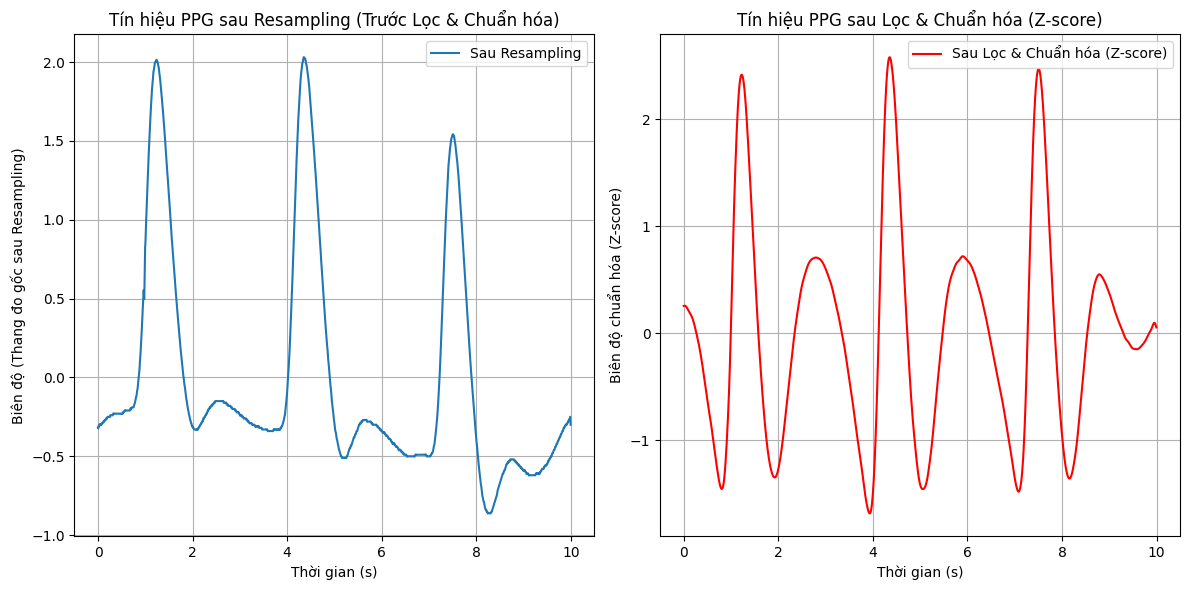

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Paths to the data files ---
# Adjust these paths if necessary
signal_before_processing_path = os.path.join(r'/kaggle/working/train_folder/', 'train_data_standardized.npz')
signal_after_processing_path = os.path.join(r'/kaggle/working/train_folder/', 'train_data_standardized_preprocessed.npz')

# --- Load one sample signal BEFORE filtering/normalization ---
try:
    data_before = np.load(signal_before_processing_path)
    # Let's take the first PPG signal segment again
    ppg_sample_before = data_before['ppg'][0]
    fs = 250 # Sampling frequency after standardization
    time_axis = np.arange(len(ppg_sample_before)) / fs
    print(f"Loaded sample BEFORE processing: Length={len(ppg_sample_before)}")

except FileNotFoundError:
    print(f"Error: Data file not found at {signal_before_processing_path}")
    ppg_sample_before = None

# --- Load the corresponding sample signal AFTER filtering/normalization ---
try:
    data_after = np.load(signal_after_processing_path)
    # Take the first PPG signal segment
    ppg_sample_after = data_after['ppg'][0]
    print(f"Loaded sample AFTER processing: Length={len(ppg_sample_after)}")

except FileNotFoundError:
    print(f"Error: Data file not found at {signal_after_processing_path}")
    ppg_sample_after = None

# --- Plotting for comparison (Figure 3.5) ---
if ppg_sample_before is not None and ppg_sample_after is not None:
    plt.figure(figsize=(12, 6))

    # Subplot 1: Signal Before Filtering/Normalization (but after resampling)
    plt.subplot(1, 2, 1)
    plt.plot(time_axis, ppg_sample_before, label='Sau Resampling')
    plt.title('T√≠n hi·ªáu PPG sau Resampling (Tr∆∞·ªõc L·ªçc & Chu·∫©n h√≥a)')
    plt.xlabel('Th·ªùi gian (s)')
    plt.ylabel('Bi√™n ƒë·ªô (Thang ƒëo g·ªëc sau Resampling)')
    plt.legend()
    plt.grid(True)

    # Subplot 2: Signal After Filtering/Normalization
    plt.subplot(1, 2, 2)
    plt.plot(time_axis, ppg_sample_after, label='Sau L·ªçc & Chu·∫©n h√≥a (Z-score)', color='red')
    plt.title('T√≠n hi·ªáu PPG sau L·ªçc & Chu·∫©n h√≥a (Z-score)')
    plt.xlabel('Th·ªùi gian (s)')
    plt.ylabel('Bi√™n ƒë·ªô chu·∫©n h√≥a (Z-score)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.savefig('figure_3_5_filtering_normalization_example.png') # Save the figure
    plt.show()
else:
    print("Could not generate plot because one or both data samples failed to load.")